# Problem 1

## Preprocessing
First, we need to read the data. After that, we perform preprocessing steps. Since the magnitudes of different feature values vary significantly, we normalize the data using the `MinMaxScaler` function, which normalize the feature values in a way that their values fall between 0 and 1.

Next, we add a new column to the dataset, representing the target variable: cloud cover six hours later. Our objective is to predict cloud cover six hours ahead based on the given features for a specific location. The target value for a particular data point (defined by a specific day, time, and location) corresponds to the cloud cover at the same location and day but six hours later.

Finally, for the last day in the dataset, some time slots (specifically after 17:00) lack cloud cover data for six hours ahead, resulting in NaN values in the target column. To handle this, we drop these rows from the dataset.

We distribute our data across three sets: training, validation, and test. A common split is:

- **Training set:** 70%
- **Validation set:** 15%
- **Test set:** 15%

To achieve this, follow these steps:

1. **Assign Features and Targets:**  
   Assign all features to a variable `X` and the target values to a variable `y`.

2. **Initial Split:**  
   Use the `train_test_split` function to split the data into a training set (70%) and a temporary set (30%).

3. **Secondary Split:**  
   Apply `train_test_split` again on the temporary set to divide it into a validation set (15% of the total data) and a test set (15% of the total data).
   
   
For the next step, let’s recall the main objective of the problem: predicting cloud cover for each location at a specific day and time, six hours ahead. As observed, cloud cover values are continuous.

However, our primary interest is determining whether there will be cloud cover at a given location in six hours. This allows us to frame the problem as a logistic regression task. To achieve this, we modify the target column ("cc + 6") so that values greater than or equal to 0 are labeled as 1, indicating the presence of cloud cover, while all other values are labeled as 0, indicating no cloud cover.

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

##### Reading Data #####
dataset_Hawaii = xr.open_dataset("Hawaii1994-2023 March.nc")
df_Hawaii = dataset_Hawaii.to_dataframe()

##### Removiong Index #####
df_Hawaii_new = pd.DataFrame(df_Hawaii.values, columns = df_Hawaii.columns)

##### Adding Target Column #####
df_Hawaii_new_target = df_Hawaii_new.copy()
df_Hawaii_new_target['cc + 6'] = df_Hawaii_new_target['cc'].shift(-6*289)
df_Hawaii_new_target = df_Hawaii_new_target.dropna()

##### Assigning Value of 1 When We Might Have Clouds 6 Hours ahead and Otherwise 0 #####
df_Hawaii_new_target_labeled = df_Hawaii_new_target.copy()
df_Hawaii_new_target_labeled['cc + 6'] = np.where(df_Hawaii_new_target_labeled['cc + 6'] >= 0.007, 1, 0)


##### Spliting Data #####
X = df_Hawaii_new_target_labeled.loc[:, "d":"vo"]
y = df_Hawaii_new_target_labeled["cc + 6"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size = 0.5, random_state = 0, stratify = y_temp
)

df_Hawaii_new_target_labeled_train = pd.concat([X_train, y_train], axis = 1)
df_Hawaii_new_target_labeled_val = pd.concat([X_val, y_val], axis = 1)
df_Hawaii_new_target_labeled_test = pd.concat([X_test, y_test], axis = 1)

##### Scaling the Data Values #####
scaler = MinMaxScaler()
##### Train set #####
train_features = df_Hawaii_new_target_labeled_train.drop(columns = ['cc + 6'])  # Exclude 'cc + 6'
train_scaled_features = pd.DataFrame(scaler.fit_transform(train_features), columns = train_features.columns, index = train_features.index)
df_Hawaii_new_target_labeled_train_scaled = pd.concat([train_scaled_features, df_Hawaii_new_target_labeled_train[['cc + 6']]], axis=1)

##### Validation set #####
val_features = df_Hawaii_new_target_labeled_val.drop(columns=['cc + 6'])
val_scaled_features = pd.DataFrame(scaler.fit_transform(val_features), columns=val_features.columns, index = val_features.index)
df_Hawaii_new_target_labeled_val_scaled = pd.concat([val_scaled_features, df_Hawaii_new_target_labeled_val[['cc + 6']]], axis=1)

##### Test set #####
test_features = df_Hawaii_new_target_labeled_test.drop(columns=['cc + 6'])
test_scaled_features = pd.DataFrame(scaler.fit_transform(test_features), columns=test_features.columns, index = test_features.index)
df_Hawaii_new_target_labeled_test_scaled = pd.concat([test_scaled_features, df_Hawaii_new_target_labeled_test[['cc + 6']]], axis=1)


### Checking the Minimum, Maximum, and the Range of Features
Now, we check the maximum, minimum, and the range of each feature values for the features both before and after scaling. We can see after scaling, `o3`, `ciwc`, and `cswc ` has the minimum of zero and maximum of almost zero. These features even before scaling has the minimum and maximum of almost zero.

In [2]:
##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for train dataset#####
min_values_nonscaled_train = df_Hawaii_new_target_labeled_train.min()
max_values_nonscaled_train = df_Hawaii_new_target_labeled_train.max()
range_values_nonscaled_train = max_values_nonscaled_train - min_values_nonscaled_train
summary_df_Hawaii_new_target_labeled_train = pd.DataFrame({
    'min': min_values_nonscaled_train,
    'max': max_values_nonscaled_train,
    'range': range_values_nonscaled_train
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Train Dataset:")
print(summary_df_Hawaii_new_target_labeled_train)

min_values_scaled_train = df_Hawaii_new_target_labeled_train_scaled.min()
max_values_scaled_train = df_Hawaii_new_target_labeled_train_scaled.max()
range_values_scaled_train = max_values_scaled_train - min_values_scaled_train
summary_df_Hawaii_new_target_labeled_train_scaled = pd.DataFrame({
    'min': min_values_scaled_train,
    'max': max_values_scaled_train,
    'range': range_values_scaled_train
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Train Dataset:")
print(summary_df_Hawaii_new_target_labeled_train_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for validation dataset#####
min_values_nonscaled_val = df_Hawaii_new_target_labeled_val.min()
max_values_nonscaled_val = df_Hawaii_new_target_labeled_val.max()
range_values_nonscaled_val = max_values_nonscaled_val - min_values_nonscaled_val
summary_df_Hawaii_new_target_labeled_val = pd.DataFrame({
    'min': min_values_nonscaled_val,
    'max': max_values_nonscaled_val,
    'range': range_values_nonscaled_val
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Validation Dataset:")
print(summary_df_Hawaii_new_target_labeled_val)

min_values_scaled_val = df_Hawaii_new_target_labeled_val_scaled.min()
max_values_scaled_val = df_Hawaii_new_target_labeled_val_scaled.max()
range_values_scaled_val = max_values_scaled_val - min_values_scaled_val
summary_df_Hawaii_new_target_labeled_val_scaled = pd.DataFrame({
    'min': min_values_scaled_val,
    'max': max_values_scaled_val,
    'range': range_values_scaled_val
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Validation Dataset:")
print(summary_df_Hawaii_new_target_labeled_val_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for test dataset#####
min_values_nonscaled_test = df_Hawaii_new_target_labeled_test.min()
max_values_nonscaled_test = df_Hawaii_new_target_labeled_test.max()
range_values_nonscaled_test = max_values_nonscaled_test - min_values_nonscaled_test
summary_df_Hawaii_new_target_test = pd.DataFrame({
    'min': min_values_nonscaled_test,
    'max': max_values_nonscaled_test,
    'range': range_values_nonscaled_test
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Test Dataset:")
print(summary_df_Hawaii_new_target_test)

min_values_scaled_test = df_Hawaii_new_target_labeled_test_scaled.min()
max_values_scaled_test = df_Hawaii_new_target_labeled_test_scaled.max()
range_values_scaled_test = max_values_scaled_test - min_values_scaled_test
summary_df_Hawaii_new_target_labeled_test_scaled = pd.DataFrame({
    'min': min_values_scaled_test,
    'max': max_values_scaled_test,
    'range': range_values_scaled_test
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Test Dataset:")
print(summary_df_Hawaii_new_target_labeled_test_scaled)


--------------------------------------------------
Summary of each Column Feature before Scaling for Train Dataset:
                 min           max         range
d      -5.912387e-04  4.430288e-04  1.034267e-03
cc      2.927346e-18  1.000000e+00  1.000000e+00
z      -1.028008e+02  2.374102e+03  2.476902e+03
o3      3.517674e-08  1.340989e-07  9.892215e-08
pv     -3.230250e-05  4.475347e-05  7.705597e-05
r       4.210423e+00  1.065382e+02  1.023278e+02
ciwc    0.000000e+00  3.278255e-07  3.278255e-07
clwc   -1.036821e-19  1.896858e-03  1.896858e-03
q       7.685178e-04  1.856444e-02  1.779593e-02
crwc   -4.562067e-20  1.893282e-03  1.893282e-03
cswc    0.000000e+00  1.490116e-08  1.490116e-08
t       2.882170e+02  3.025466e+02  1.432959e+01
u      -2.284946e+01  1.947984e+01  4.232930e+01
v      -1.850601e+01  2.029406e+01  3.880007e+01
w      -3.243468e+00  2.930690e+00  6.174158e+00
vo     -6.483512e-04  8.764663e-04  1.524817e-03
cc + 6  0.000000e+00  1.000000e+00  1.000000e+00
--

## Logistic Regression Model

Now that our data is clean and ready, we can use the Scikit-Learn library to train and evaluate our model. The steps for training our model using the logistic regression method are as follows:

1. Split the data into three sets: training, validation, and test, which is already done.
2. Train the model using Scikit-Learn’s built-in function.
3. Compute evaluation metrics using the validation set to determine the optimal threshold for our problem.
4. Assess the model's performance on the test data.

In the following sections, we will go through each of these steps in detail.

### Splitting the Dataset
We can check the distribution of the data into these three sets to make sure that the data with each label are distributed properly among all the sets.

In [3]:
##### Creating Training, Validation, and Test Sets #####

X_train = df_Hawaii_new_target_labeled_train_scaled.loc[:, "d":"vo"]
y_train = df_Hawaii_new_target_labeled_train_scaled["cc + 6"]

X_val = df_Hawaii_new_target_labeled_val_scaled.loc[:, "d":"vo"]
y_val = df_Hawaii_new_target_labeled_val_scaled["cc + 6"]

X_test = df_Hawaii_new_target_labeled_test_scaled.loc[:, "d":"vo"]
y_test = df_Hawaii_new_target_labeled_test_scaled["cc + 6"]

print("-" * 50)
print("Label distribution in Training Set:")
print(y_train.value_counts())

print("-" * 50)
print("\nLabel distribution in Validation Set:")
print(y_val.value_counts())

print("-" * 50)
print("\nLabel distribution in Test Set:")
print(y_test.value_counts())

--------------------------------------------------
Label distribution in Training Set:
0    4418803
1      95319
Name: cc + 6, dtype: int64
--------------------------------------------------

Label distribution in Validation Set:
0    946887
1     20425
Name: cc + 6, dtype: int64
--------------------------------------------------

Label distribution in Test Set:
0    946886
1     20426
Name: cc + 6, dtype: int64


### Training the Logistic Regression Model

Now that we have properly split our data, we can train our model using Scikit-Learn’s `LogisticRegression` on the training set (`X_train`). We employ L2 (Ridge) regularization, which by default uses a regularization coefficient (`C`) of 1. However, our goal is to identify the optimal value of `C`.

Recall that `C` is the inverse of the regularization strength:
- **High values of `C`:** Weaker regularization, which allows weights to become large. This can lead to overfitting, where the model fits the training data very well but performs poorly on unseen test data.
- **Low values of `C`:** Stronger regularization, which constrains the weights to be small. This might result in underfitting, where the model is too restricted and performs poorly on both training and test data.

In practice:
- **Underfitting:** Models tend to have high cost values and poor predictions on both training and test sets.
- **Overfitting:** Models show low cost values on the training set but perform significantly worse on the test set.
- **Optimal Model:** Strikes a balance by achieving an acceptable cost value and good predictive accuracy on both training and test sets.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

##### Determining the Best Value for Regularization Coefficient #####
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

final_costs = {}
models = {}

for C in C_values:
    model = LogisticRegression(
        penalty='l2',
        C = C,
        solver = 'lbfgs',
        max_iter = 1000,
        random_state = 0,
)
    
    model.fit(X_train, y_train)
    probas = model.predict_proba(X_train)[:, 1]
    cost = log_loss(y_train, probas)
    
    
    
    final_costs[C] = cost
    models[C] = model
    
    print(f"C = {C}: Final Cost = {cost:.3f}")

C = 0.0001: Final Cost = 0.095
C = 0.001: Final Cost = 0.075
C = 0.01: Final Cost = 0.063
C = 0.1: Final Cost = 0.062
C = 1: Final Cost = 0.062
C = 10: Final Cost = 0.062
C = 100: Final Cost = 0.062


### Evaluation Process
We use the validation set for evaluation process. Before starting the evaluation process some explainations are necessary. There are many metrics to evaluate the performance of a model:

1. **Accuracy:** Good for balanced datasets but may be misleading when classes are imbalanced. 

$$
\frac{TP + TN}{\text{Total Samples}}
$$

2. **Precision:** Indicates the correctness of positive predictions. Important when the cost of false positives is high.

$$
\frac{TP}{TP + FP}
$$

3. **Recall (Sensitivity):** Indicates how well the model captures all actual positives. In weather forecasting (like predicting cloud cover), missing a cloud event (false negative) might have significant consequences. Thus, high recall is typically crucial.

$$
\frac{TP}{TP + FN}
$$

4. **Specificity:** Measures the model’s ability to correctly identify negatives. It is important when false alarms (false positives) are costly.

$$
\frac{TN}{TN + FP}
$$

5. **F1 Score:** Provides a balance between precision and recall, which is useful when you need to optimize both metrics simultaneously.

$$
2\times\frac{Precision\times Recall}{Precision + Recall}
$$

Where:

- **TP (True Positives):** Actual 1’s predicted as 1.
- **TN (True Negatives):** Actual 0’s predicted as 0.
- **FP (False Positives):** Actual 0’s predicted as 1.
- **FN (False Negatives):** Actual 1’s predicted as 0.


For cloud cover prediction, recall is often very important because missing an actual cloud cover event (a false negative) could lead to unanticipated weather conditions affecting operations (for instance aviation or solar energy production). However, if false alarms (false positives) are also problematic, one might want to balance recall with precision. The F1 score is a good overall measure in such cases.

The model predicts probabilities for the positive class on the validation set. Then, for each threshold value (from 0 to 1), the code converts these probabilities into binary predictions: if a probability is above the threshold, the prediction is 1; otherwise, it is 0.

All metrics for each threshold are stored in a list and then converted to a Pandas DataFrame for a neat tabular display.

The “best” threshold is chosen as the one that yields the highest F1 score. This is because the F1 score balances precision and recall, which is often critical when false negatives and false positives are both important.

Finally, the ROC curve is plotted using `roc_curve` (which computes true positive rate vs. false positive rate at various thresholds) and auc (for the area under the curve).
The code also marks the operating point corresponding to the chosen best threshold on the ROC curve.

At the end we compute evaluation metrics for every regularization parameter to decide on the best value for this hyper parameter based on these evaluation metrics.

--------------------------------------------------

Evaluating model with C=0.0001

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05   2278  945214    1673  18147     0.980      0.577   0.112   
2        0.10      3  946887       0  20422     0.979      1.000   0.000   
3        0.15      0  946887       0  20425     0.979      0.000   0.000   
4        0.20      0  946887       0  20425     0.979      0.000   0.000   
5        0.25      0  946887       0  20425     0.979      0.000   0.000   
6        0.30      0  946887       0  20425     0.979      0.000   0.000   
7        0.35      0  946887       0  20425     0.979      0.000   0.000   
8        0.40      0  946887       0  20425     0.979      0.000   0.000   
9        0.45      0  946887       0  20425     0.979      0.000   0.000   
10       0.50

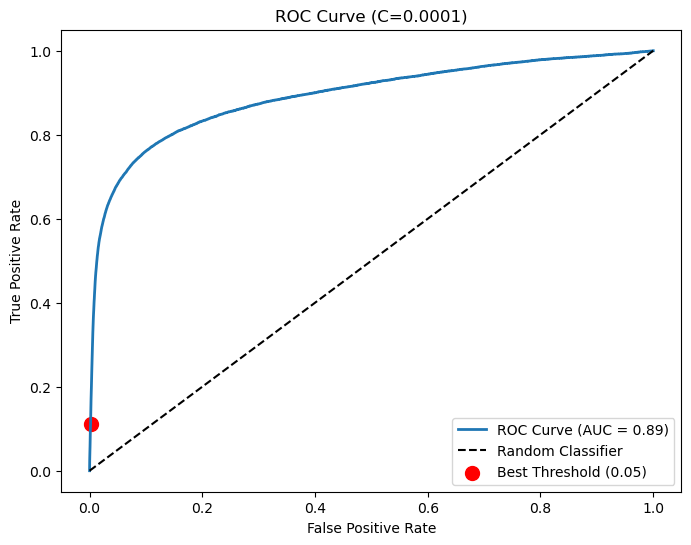

--------------------------------------------------

Evaluating model with C=0.001

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05  10513  934298   12589   9912     0.977      0.455   0.515   
2        0.10   6243  942359    4528  14182     0.981      0.580   0.306   
3        0.15   3781  944458    2429  16644     0.980      0.609   0.185   
4        0.20   2918  944980    1907  17507     0.980      0.605   0.143   
5        0.25   2522  945163    1724  17903     0.980      0.594   0.123   
6        0.30   2320  945301    1586  18105     0.980      0.594   0.114   
7        0.35   2196  945457    1430  18229     0.980      0.606   0.108   
8        0.40   2061  945603    1284  18364     0.980      0.616   0.101   
9        0.45   1901  945752    1135  18524     0.980      0.626   0.093   
10       0.50 

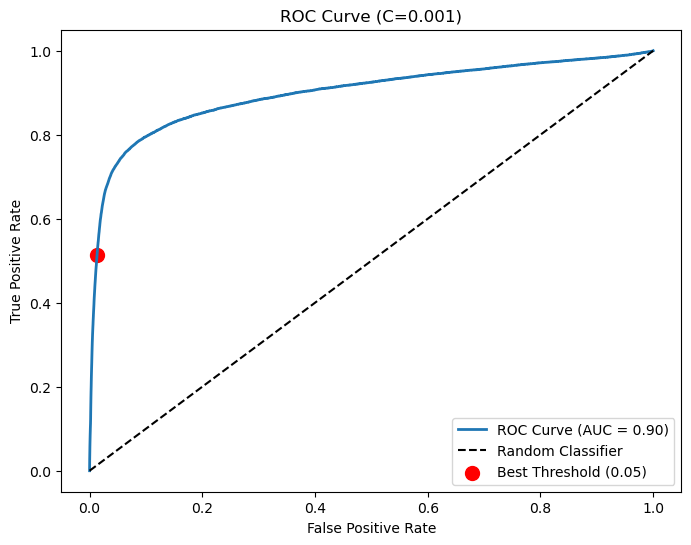

--------------------------------------------------

Evaluating model with C=0.01

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05  12532  927564   19323   7893     0.972      0.393   0.614   
2        0.10  10320  934721   12166  10105     0.977      0.459   0.505   
3        0.15   8841  937942    8945  11584     0.979      0.497   0.433   
4        0.20   7716  939915    6972  12709     0.980      0.525   0.378   
5        0.25   6834  941254    5633  13591     0.980      0.548   0.335   
6        0.30   6147  942283    4604  14278     0.980      0.572   0.301   
7        0.35   5438  943139    3748  14987     0.981      0.592   0.266   
8        0.40   4815  943772    3115  15610     0.981      0.607   0.236   
9        0.45   4216  944379    2508  16209     0.981      0.627   0.206   
10       0.50  

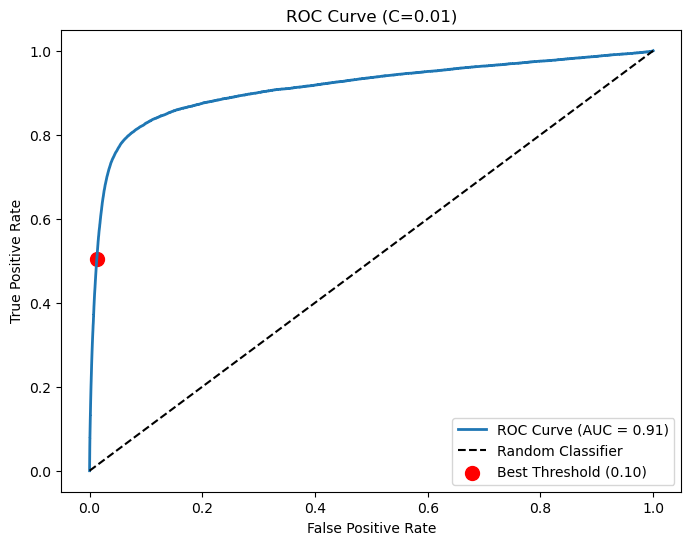

--------------------------------------------------

Evaluating model with C=0.1

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05  12687  926926   19961   7738     0.971      0.389   0.621   
2        0.10  10767  933355   13532   9658     0.976      0.443   0.527   
3        0.15   9508  936524   10363  10917     0.978      0.478   0.466   
4        0.20   8520  938523    8364  11905     0.979      0.505   0.417   
5        0.25   7740  939915    6972  12685     0.980      0.526   0.379   
6        0.30   6995  940982    5905  13430     0.980      0.542   0.342   
7        0.35   6393  941878    5009  14032     0.980      0.561   0.313   
8        0.40   5819  942616    4271  14606     0.980      0.577   0.285   
9        0.45   5277  943242    3645  15148     0.981      0.591   0.258   
10       0.50   

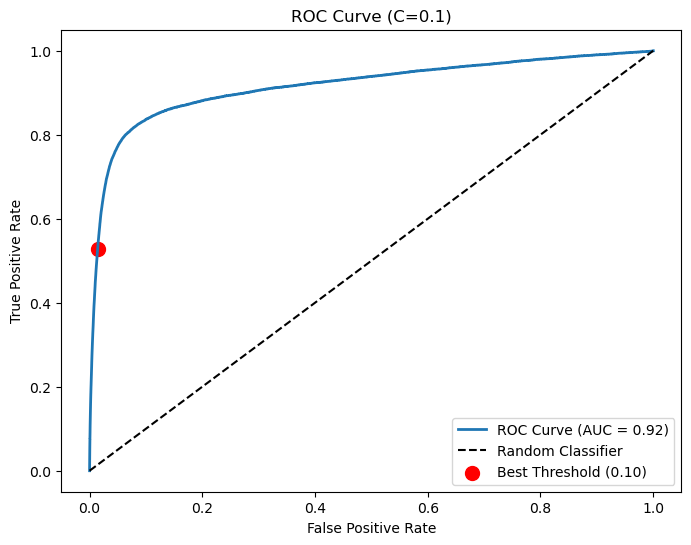

--------------------------------------------------

Evaluating model with C=1

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05  12696  926871   20016   7729     0.971      0.388   0.622   
2        0.10  10823  933167   13720   9602     0.976      0.441   0.530   
3        0.15   9587  936346   10541  10838     0.978      0.476   0.469   
4        0.20   8606  938326    8561  11819     0.979      0.501   0.421   
5        0.25   7826  939753    7134  12599     0.980      0.523   0.383   
6        0.30   7138  940818    6069  13287     0.980      0.540   0.349   
7        0.35   6499  941708    5179  13926     0.980      0.557   0.318   
8        0.40   5931  942455    4432  14494     0.980      0.572   0.290   
9        0.45   5415  943091    3796  15010     0.981      0.588   0.265   
10       0.50   48

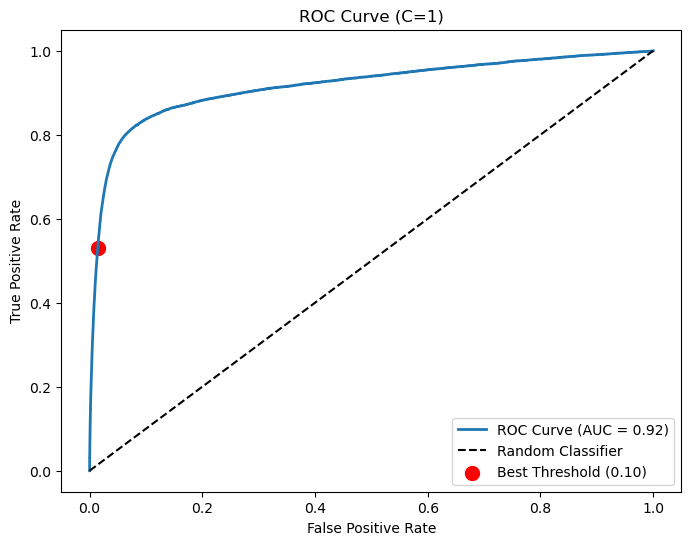

--------------------------------------------------

Evaluating model with C=10

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05  12698  926858   20029   7727     0.971      0.388   0.622   
2        0.10  10834  933153   13734   9591     0.976      0.441   0.530   
3        0.15   9596  936324   10563  10829     0.978      0.476   0.470   
4        0.20   8618  938301    8586  11807     0.979      0.501   0.422   
5        0.25   7834  939740    7147  12591     0.980      0.523   0.384   
6        0.30   7142  940803    6084  13283     0.980      0.540   0.350   
7        0.35   6508  941689    5198  13917     0.980      0.556   0.319   
8        0.40   5943  942432    4455  14482     0.980      0.572   0.291   
9        0.45   5422  943074    3813  15003     0.981      0.587   0.265   
10       0.50   4

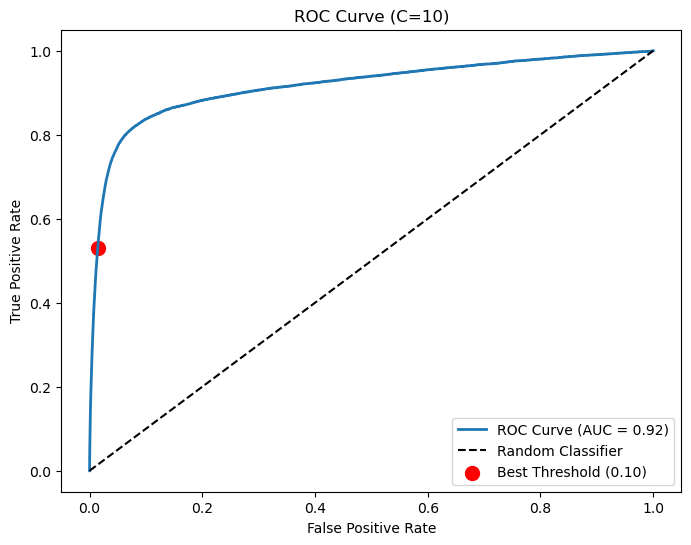

--------------------------------------------------

Evaluating model with C=100

Evaluation Metrics for Different Thresholds on the Validation Set:
    threshold     TP      TN      FP     FN  Accuracy  Precision  Recall  \
0        0.00  20425       0  946887      0     0.021      0.021   1.000   
1        0.05  12697  926852   20035   7728     0.971      0.388   0.622   
2        0.10  10835  933150   13737   9590     0.976      0.441   0.530   
3        0.15   9598  936323   10564  10827     0.978      0.476   0.470   
4        0.20   8620  938297    8590  11805     0.979      0.501   0.422   
5        0.25   7835  939739    7148  12590     0.980      0.523   0.384   
6        0.30   7143  940802    6085  13282     0.980      0.540   0.350   
7        0.35   6510  941686    5201  13915     0.980      0.556   0.319   
8        0.40   5943  942428    4459  14482     0.980      0.571   0.291   
9        0.45   5422  943071    3816  15003     0.981      0.587   0.265   
10       0.50   

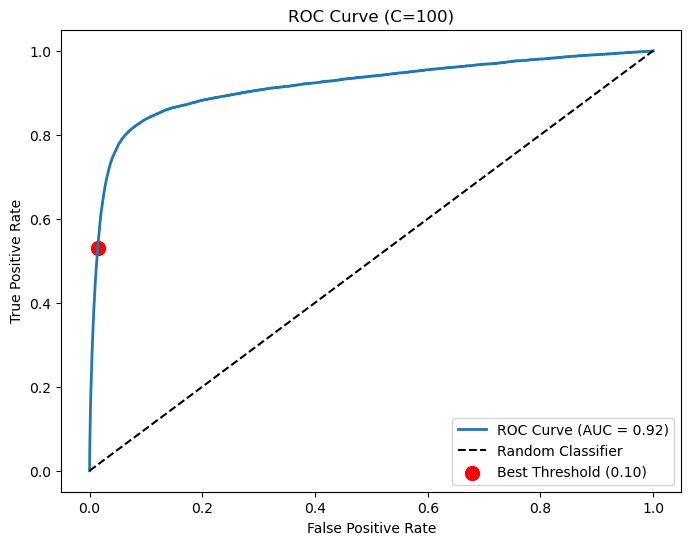

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_curve, auc

# Define different values of C
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    print("-" * 50)
    print(f"\nEvaluating model with C={C}")
    
    model = models[C]
    y_val_proba = model.predict_proba(X_val)[:, 1]
    
    thresholds = np.linspace(0, 1, 21)
    results = []
    
    for thresh in thresholds:
        y_val_pred = (y_val_proba >= thresh).astype(int)
        
        TP = np.sum((y_val == 1) & (y_val_pred == 1))
        TN = np.sum((y_val == 0) & (y_val_pred == 0))
        FP = np.sum((y_val == 0) & (y_val_pred == 1))
        FN = np.sum((y_val == 1) & (y_val_pred == 0))
        
        Accuracy = (TP + TN) / len(y_val)
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
        
        results.append({
            "threshold": thresh,
            "TP": TP,
            "TN": TN,
            "FP": FP,
            "FN": FN,
            "Accuracy": Accuracy,
            "Precision": Precision,
            "Recall": Recall,
            "Specificity": Specificity,
            "F1": F1
        })
    
    df_results = pd.DataFrame(results)
    print("\nEvaluation Metrics for Different Thresholds on the Validation Set:")
    print(df_results.round(3))
    
    best_threshold_row = df_results.loc[df_results["F1"].idxmax()]
    best_threshold = best_threshold_row["threshold"]
    print("\nBest threshold metrics (based on maximum F1 score):")
    print(best_threshold_row.round(3).to_dict())
    
    fpr, tpr, roc_thresholds = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (C={C})")
    
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
    
    y_val_pred_best = (y_val_proba >= best_threshold).astype(int)
    TP_best = np.sum((y_val == 1) & (y_val_pred_best == 1))
    TN_best = np.sum((y_val == 0) & (y_val_pred_best == 0))
    FP_best = np.sum((y_val == 0) & (y_val_pred_best == 1))
    FN_best = np.sum((y_val == 1) & (y_val_pred_best == 0))
    tpr_best = TP_best / (TP_best + FN_best) if (TP_best + FN_best) > 0 else 0
    fpr_best = FP_best / (FP_best + TN_best) if (FP_best + TN_best) > 0 else 0
    
    plt.scatter(fpr_best, tpr_best, color="red", s=100, label=f"Best Threshold ({best_threshold:.2f})")
    plt.legend(loc="lower right")
    plt.show()


### Deciding on the Value of  Regularization Parameteres
The best value for Regularization Parameter is 0.1. Evaluation metrics for this model is as follows:

- **Threshold: 0.1**
- **TP: 10767 out of 20425**
- **TN: 933355 out of 946932**
- **FP: 13532 out of 946932**
- **FN: 9658 out of 20425**
- **Accuracy: 0.98**
- **Precision: 0.44**
- **Recall: 0.53**
- **F1: 0.48**
- **AUC: 0.92**
- **Loss: 0.062**

Based on our analysis, we selected `C = 0.1` as the optimal value for this problem. Comparing the weight values from the best model (`C = 0.01`) with those from a model using a very low `C = 0.0001`, we observe that the average absolute weight values differ by one order of magnitude.

Additionally, we notice that three of the weights are approximately zero, indicating that the regularization has effectively nullified the corresponding features, deeming them unimportant for the model.

Although the model achieves a very high accuracy of 0.981 on both training and validation sets, this result is misleading given the severe class imbalance in our dataset— 136,170 samples are labeled as class 1 while 6,312,576 are labeled as class 0. Such imbalance means that even a dummy classifier could reach similar accuracy levels. Consequently, we must rely on alternative evaluation metrics to properly assess our model’s performance, which will be discussed in the next section.

In [6]:
from sklearn.metrics import accuracy_score

##### Comparing parameters Values for Best C and Low C #####
lowest_C = min(C_values)
best_C = 0.1

lowest_model = models[lowest_C]
best_model = models[best_C]


avg_weights_lowest = np.mean(np.abs(lowest_model.coef_))
avg_weights_best = np.mean(np.abs(best_model.coef_))

print(f"Lowest C ({lowest_C}): Average Absolute Weight = {avg_weights_lowest:.5f}")
print(f"Best C ({best_C}): Average Absolute Weight = {avg_weights_best:.5f}")

print("-" * 50)
print(f"Best C ({best_C}):")
print("Weights:", best_model.coef_)
print("Intercept:", best_model.intercept_)

##### Checking the Imbalancy in Data #####
print("-" * 50)
num_ones = (y == 1).sum()
num_zeros = (y == 0).sum()
print("Number of rows with value 1:", num_ones)
print("Number of rows with value 0:", num_zeros)

Lowest C (0.0001): Average Absolute Weight = 0.30703
Best C (0.1): Average Absolute Weight = 3.81390
--------------------------------------------------
Best C (0.1):
Weights: [[-3.19861484e+00  7.93845682e-01  9.34811429e-01  1.38475760e-06
  -1.47843404e+00  1.63843578e+01 -7.90804876e-09 -6.54814141e-01
  -1.17192539e+01  2.68691061e+00 -2.45429608e-10  7.78095816e+00
   2.40198692e+00 -1.05857522e+00 -1.14488040e+01 -4.81032146e-01]]
Intercept: [-4.87017278]
--------------------------------------------------
Number of rows with value 1: 136170
Number of rows with value 0: 6312576


## Prediction
Now that we have our final model with the best hyper-parameters, we can see how well our model predicits new data.

In [7]:
##### Model Prediction on New Data #####
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

TP_test = np.sum((y_test == 1) & (y_test_pred == 1))
TN_test = np.sum((y_test == 0) & (y_test_pred == 0))
FP_test = np.sum((y_test == 0) & (y_test_pred == 1))
FN_test = np.sum((y_test == 1) & (y_test_pred == 0))

accuracy_test = (TP_test + TN_test) / len(y_test)
precision_test = TP_test / (TP_test + FP_test) if (TP_test + FP_test) > 0 else 0
recall_test = TP_test / (TP_test + FN_test) if (TP_test + FN_test) > 0 else 0  # also known as sensitivity or TPR
specificity_test = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test) if (precision_test + recall_test) > 0 else 0

results_test = pd.DataFrame({
    "Threshold": [best_threshold],
    "TP": [TP_test],
    "TN": [TN_test],
    "FP": [FP_test],
    "FN": [FN_test],
    "Accuracy": [accuracy_test],
    "Precision": [precision_test],
    "Recall": [recall_test],
    "Specificity": [specificity_test],
    "F1 Score": [f1_test]
})

print("Test Set Performance at Best Threshold:")
print(results_test)

Test Set Performance at Best Threshold:
   Threshold     TP      TN     FP    FN  Accuracy  Precision    Recall  \
0        0.1  11750  930926  15960  8676  0.974531   0.424035  0.575247   

   Specificity  F1 Score  
0     0.983145    0.4882  


## Interpretation of the Results

### Data Imbalance
As we said before, the dataset is highly imbalanced, with roughly **95% negatives (0.0)** and only about **2% positives (1.0)**. This means that even a naive classifier predicting all negatives would achieve high accuracy. Consequently, metrics like precision, recall, and F1 score are more informative than overall accuracy.

### Threshold Choice
The best threshold of **0.15** (instead of the typical 0.5) was selected to maximize the F1 score. This lower threshold makes the classifier more "liberal" in predicting the positive class (cloud cover) to capture more true positives, even at the risk of increasing false positives.

### Performance Metrics

#### Recall (~0.57):
The recall indicates that the model is correctly identifying around **57%** of actual cloud cover events. In practical terms, nearly half of the events are missed (false negatives).

#### Precision (~0.42):
With precision around **42%**, when the model predicts cloud cover, there's roughly a **40% chance that it’s a false alarm**. This reflects the trade-off made by lowering the threshold to improve recall.

#### F1 Score (~0.48–0.49):
The F1 score, as a harmonic mean of precision and recall, is around **0.48–0.49**. This moderate value suggests that neither precision nor recall is particularly strong, but the balance between them is being optimized.

#### Accuracy (~0.97):
The high accuracy (approximately **97%**) is largely due to the overwhelming number of negative cases. In imbalanced settings, accuracy can be misleading.

#### AUC (0.91):
An AUC of **0.91** is very encouraging—it indicates that the model is excellent at ranking instances in terms of their likelihood of cloud cover. This suggests that while the binary predictions (at the 0.15 threshold) may have room for improvement, the underlying probability estimates are strong.

### Consistency Between Validation and Test Sets
The metrics for both the validation and test sets are nearly identical. This consistency implies that the model’s performance is stable and generalizes well to unseen data.

## Using the Model to Predict Stockholm Weather Data
Now we want to use the model we trained on Hawaii weather data, for predicting the cloud cover in Stockholm. It is obvious that the weather data for these two regions are very different from each other, however, we want to see how good our model works on Stockholm.

## Preprocessing
Just like before, first, we need to read the data. After that, we perform preprocessing steps. Since the magnitudes of different feature values vary significantly, we normalize the data using the `StandardScaler` function, which normalize the feature values based on their mean and variance in a way that they all have mean of zero and standard deviartion of 1.

Next, we add a new column to the dataset, representing the target variable: cloud cover six hours later. Our objective is to predict cloud cover six hours ahead based on the given features for a specific location. The target value for a particular data point (defined by a specific day, time, and location) corresponds to the cloud cover at the same location and day but six hours later.

Finally, for the last day in the dataset, some time slots (specifically after 17:00) lack cloud cover data for six hours ahead, resulting in NaN values in the target column. To handle this, we drop these rows from the dataset.

In [8]:
##### Reading Data #####
dataset_Stockholm = xr.open_dataset("Stockholm_03.nc")
df_Stockholm = dataset_Stockholm.to_dataframe()

##### Removiong Index #####
df_Stockholm_new = pd.DataFrame(df_Stockholm.values, columns = df_Stockholm.columns)

##### Scaling the Data Values #####
scaler = MinMaxScaler()
df_Stockholm_scaled = pd.DataFrame(scaler.fit_transform(df_Stockholm_new), columns = df_Stockholm_new.columns)

##### Creating Target Column #####
df_Stockholm_scaled['cc + 6'] = df_Stockholm_scaled['cc'].shift(-6)
df_Stockholm_scaled = df_Stockholm_scaled.dropna()

df_Stockholm_scaled.head()

,d,cc,z,o3,pv,r,ciwc,clwc,q,crwc,cswc,t,u,v,w,vo,cc + 6
0,0.0,0.0,0.287504,0.0,0.0,0.539362,0.0,0.0,0.046710,0.0,0.0,0.518442,0.570947,0.415610,0.253846,0.769558,0.0
1,0.0,0.0,0.274594,0.0,0.0,0.560023,0.0,0.0,0.030790,0.0,0.0,0.528644,0.582513,0.428183,0.245055,0.771160,0.0
2,0.0,0.0,0.228038,0.0,0.0,0.538172,0.0,0.0,0.023617,0.0,0.0,0.552377,0.575601,0.449607,0.252122,0.786313,0.0
3,0.0,0.0,0.240093,0.0,0.0,0.513100,0.0,0.0,0.022028,0.0,0.0,0.555004,0.584131,0.464942,0.250443,0.788876,0.0
4,0.0,0.0,0.236247,0.0,0.0,0.478766,0.0,0.0,0.029602,0.0,0.0,0.562075,0.581445,0.470146,0.251282,0.792874,0.0


### Labeling the Data Points Correctly
For the next step, let’s recall the main objective of the problem: predicting cloud cover for each location at a specific day and time, six hours ahead. As observed, cloud cover values are continuous.

However, our primary interest is determining whether there will be cloud cover at a given location in six hours. This allows us to frame the problem as a logistic regression task. To achieve this, we modify the target column ("cc + 6") so that values greater than or equal to 0 are labeled as 1, indicating the presence of cloud cover, while all other values are labeled as 0, indicating no cloud cover.

In [10]:
##### Observing the Unique Values in Target Column #####
unique_values = df_Stockholm_scaled['cc + 6'].unique()
sorted_values = sorted(unique_values)
print(f"The values of cloud cover:\n {sorted_values}")

##### Assigning Value of 1 When We Might Have Clouds 6 Hours Ahead and Otherwise 0 #####
df_Stockholm_scaled_final = df_Stockholm_scaled.copy()
df_Stockholm_scaled_final.loc[df_Stockholm_scaled_final['cc + 6'] > 0, 'cc + 6'] = 1
df_Stockholm_scaled_final.loc[df_Stockholm_scaled_final['cc + 6'] < 0, 'cc + 6'] = 0
df_Stockholm_scaled_final.head()

The values of cloud cover:
 [0.0, 0.007812858, 0.015625715, 0.023438573, 0.03125143, 0.03906429, 0.046877146, 0.054690003, 0.06250286, 0.07031572, 0.07812858, 0.085941434, 0.09375429, 0.10156715, 0.10938001, 0.117192864, 0.12500572, 0.13281858, 0.14063144, 0.1484443, 0.15625715, 0.16407001, 0.17186761, 0.17968047, 0.18749332, 0.19530618, 0.20311904, 0.2109319, 0.21874475, 0.22655761, 0.23437047, 0.24218333, 0.24999619, 0.25780904, 0.2656219, 0.27343476, 0.28124762, 0.28906047, 0.29687333, 0.3046862, 0.31249905, 0.3203119, 0.32812476, 0.33593762, 0.34375048, 0.35156333, 0.3593762, 0.36718905, 0.3750019, 0.38281476, 0.39062762, 0.39844048, 0.40625334, 0.4140662, 0.42187905, 0.4296919, 0.43750477, 0.44531763, 0.45313048, 0.46094334, 0.4687562, 0.47656906, 0.4843819, 0.49219477, 0.49999237, 0.5078052, 0.5156181, 0.52343094, 0.5312438, 0.53905666, 0.5468695, 0.5546824, 0.56249523, 0.5703081, 0.57812095, 0.5859338, 0.59374666, 0.6015595, 0.6093724, 0.61718524, 0.6249981, 0.63281095, 0.640623

,d,cc,z,o3,pv,r,ciwc,clwc,q,crwc,cswc,t,u,v,w,vo,cc + 6
0,0.0,0.0,0.287504,0.0,0.0,0.539362,0.0,0.0,0.046710,0.0,0.0,0.518442,0.570947,0.415610,0.253846,0.769558,0.0
1,0.0,0.0,0.274594,0.0,0.0,0.560023,0.0,0.0,0.030790,0.0,0.0,0.528644,0.582513,0.428183,0.245055,0.771160,0.0
2,0.0,0.0,0.228038,0.0,0.0,0.538172,0.0,0.0,0.023617,0.0,0.0,0.552377,0.575601,0.449607,0.252122,0.786313,0.0
3,0.0,0.0,0.240093,0.0,0.0,0.513100,0.0,0.0,0.022028,0.0,0.0,0.555004,0.584131,0.464942,0.250443,0.788876,0.0
4,0.0,0.0,0.236247,0.0,0.0,0.478766,0.0,0.0,0.029602,0.0,0.0,0.562075,0.581445,0.470146,0.251282,0.792874,0.0


## Prediction
In this part first we split our features columns and target column. Then we make prediciton on our data using the exact model we trained using Hawaii data. 

In [11]:
##### Creating Data Examples #####
X_Stockholm = df_Stockholm_scaled_final.loc[:, "d":"vo"]
y_Stockholm = df_Stockholm_scaled_final["cc + 6"]


Stockholm Performance at Best Threshold:
   Threshold      TP       TN       FP      FN  Accuracy  Precision    Recall  \
0        0.1  545581  1686574  3977529  240760  0.346047   0.120621  0.693822   

   Specificity  F1 Score  
0     0.297765  0.205513  


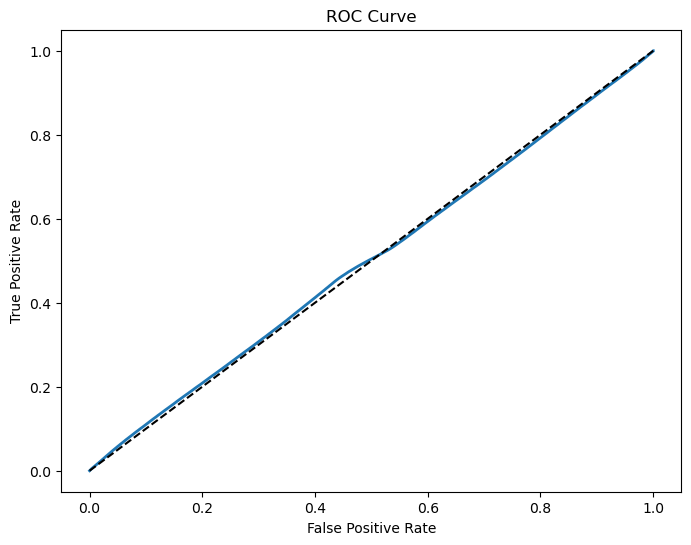

In [12]:
##### Model Prediction on New Data #####
y_Stockholm_proba = best_model.predict_proba(X_Stockholm)[:, 1]
y_Stockholm_pred = (y_Stockholm_proba >= best_threshold).astype(int)

TP_Stockholm = np.sum((y_Stockholm == 1) & (y_Stockholm_pred == 1))
TN_Stockholm = np.sum((y_Stockholm == 0) & (y_Stockholm_pred == 0))
FP_Stockholm = np.sum((y_Stockholm == 0) & (y_Stockholm_pred == 1))
FN_Stockholm = np.sum((y_Stockholm == 1) & (y_Stockholm_pred == 0))

accuracy_Stockholm = (TP_Stockholm + TN_Stockholm) / len(y_Stockholm)
precision_Stockholm = TP_Stockholm / (TP_Stockholm + FP_Stockholm) if (TP_Stockholm + FP_Stockholm) > 0 else 0
recall_Stockholm = TP_Stockholm / (TP_Stockholm + FN_Stockholm) if (TP_Stockholm + FN_Stockholm) > 0 else 0  # also known as sensitivity or TPR
specificity_Stockholm = TN_Stockholm / (TN_Stockholm + FP_Stockholm) if (TN_Stockholm + FP_Stockholm) > 0 else 0
f1_Stockholm = 2 * (precision_Stockholm * recall_Stockholm) / (precision_Stockholm + recall_Stockholm) if (precision_Stockholm + recall_Stockholm) > 0 else 0

results_Stockholm = pd.DataFrame({
    "Threshold": [best_threshold],
    "TP": [TP_Stockholm],
    "TN": [TN_Stockholm],
    "FP": [FP_Stockholm],
    "FN": [FN_Stockholm],
    "Accuracy": [accuracy_Stockholm],
    "Precision": [precision_Stockholm],
    "Recall": [recall_Stockholm],
    "Specificity": [specificity_Stockholm],
    "F1 Score": [f1_Stockholm]
})

print("Stockholm Performance at Best Threshold:")
print(results_Stockholm)


##### Plotting ROC Curve and Specifying the Best Threshold Locaation on the Plot #####
fpr, tpr, roc_thresholds = roc_curve(y_Stockholm, y_Stockholm_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc:.2f})", lw = 2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.plot([0, 1], [0, 1], 'k--', label = "Random Classifier")


## Interpretation of Model Performance on Stockholm Data

The model was originally trained on Hawaii data but has been applied to Stockholm data. The performance metrics at the best threshold (0.1) are summarized below:

- **True Positives (TP):** 622,791  
  *The model correctly identified 622,791 positive cases.*

- **True Negatives (TN):** 1,224,032  
  *The model correctly identified 1,224,032 negative cases.*

- **False Positives (FP):** 4,440,071  
  *A very high number of negatives were incorrectly labeled as positives.*

- **False Negatives (FN):** 163,550  
  *Some positive cases were missed by the model.*

### Key Performance Metrics

- **Accuracy:** 28.63%  
  *Overall, only about 29% of the predictions are correct, indicating low accuracy.*

- **Precision:** 12.30%  
  *Of the cases predicted as positive, only 12.3% were truly positive. This low precision highlights a significant number of false positives.*

- **Recall (Sensitivity):** 79.20%  
  *The model is able to identify 79.2% of the actual positive cases, indicating high sensitivity.*

- **Specificity:** 21.61%  
  *Only 21.6% of the true negatives are correctly identified, suggesting that the model performs poorly in detecting negatives.*

- **F1 Score:** 21.29%  
  *The F1 score, which balances precision and recall, is quite low.*

- **AUC:** *Near random classifier*  
  *The Area Under the Curve (AUC) being near that of a random classifier indicates that the model’s ability to discriminate between classes is very poor.*

### Overall Interpretation

- **High Recall vs. Low Precision:**  
  Although the model is effective at identifying most of the positive cases (high recall), it does so at the cost of misclassifying a large number of negative cases as positive (low precision).

- **Poor Specificity and Accuracy:**  
  The low specificity and accuracy further suggest that the model is not well-calibrated for the Stockholm data, leading to a high rate of false positives.

- **AUC Near Random:**  
  The near random AUC value confirms that the model struggles to distinguish between the positive and negative classes in this new dataset.

### Conclusion

The performance metrics indicate that the model trained on Hawaii data does not generalize well to the Stockholm dataset. The underlying differences in data distribution or feature representation between the two regions likely contribute to the poor performance.


# Problem 2
For this problem we use the Bike Sharing Dataset which is completely introduced as follows.

## Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto  
INESC Porto, Campus da FEUP  
Rua Dr. Roberto Frias, 378  
4200 - 465 Porto, Portugal

### Background

Bike sharing systems are the new generation of traditional bike rentals where the entire process—from membership to rental and return—is automated. Through these systems, users can easily rent a bike from one location and return it to another. Currently, there are over 500 bike-sharing programs worldwide, comprising more than 500,000 bicycles. There is significant interest in these systems due to their important roles in traffic management, environmental impact, and public health.

Apart from their real-world applications, the data generated by bike sharing systems is attractive for research. Unlike other transportation services such as buses or subways, bike sharing systems explicitly record the duration of travel along with departure and arrival locations. This feature transforms the bike sharing network into a virtual sensor network that can monitor urban mobility, making it possible to detect important city events by analyzing the data.

### Dataset

The bike-sharing rental process is highly correlated with environmental and seasonal factors. Weather conditions, precipitation, day of the week, season, hour of the day, etc., can all affect rental behavior. The core dataset is based on a two-year historical log (2011 and 2012) from the Capital Bikeshare system in Washington D.C., USA, which is publicly available at [Capital Bikeshare System Data](http://capitalbikeshare.com/system-data). The data have been aggregated on both an hourly and daily basis, with corresponding weather and seasonal information added. Weather data were extracted from [Freemeteo](http://www.freemeteo.com).

### Associated Tasks

- **Regression:**  
  Prediction of bike rental counts on an hourly or daily basis based on environmental and seasonal settings.

- **Event and Anomaly Detection:**  
  The count of rented bikes is correlated with events in the city, which can often be identified via search engines. For example, a Google search with the query "2012-10-30 washington d.c." returns results related to Hurricane Sandy. Some important events are identified in [1]. Therefore, the data can also be used to validate anomaly or event detection algorithms.

### Files

- **Readme.txt**  
- **hour.csv:** Bike sharing counts aggregated on an hourly basis. Records: 17,379 hours  
- **day.csv:** Bike sharing counts aggregated on a daily basis. Records: 731 days

### Dataset Characteristics

Both `hour.csv` and `day.csv` contain the following fields (note that the `hr` field is not available in `day.csv`):

- **instant:** Record index  
- **dteday:** Date  
- **season:** Season (1: spring, 2: summer, 3: fall, 4: winter)  
- **yr:** Year (0: 2011, 1: 2012)  
- **mnth:** Month (1 to 12)  
- **hr:** Hour (0 to 23)  
- **holiday:** Whether the day is a holiday (information from [DC Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule))  
- **weekday:** Day of the week  
- **workingday:** 1 if the day is neither a weekend nor a holiday, otherwise 0  
- **weathersit:**  
  - 1: Clear, Few clouds, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog  
- **temp:** Normalized temperature in Celsius (divided by 41, the maximum)  
- **atemp:** Normalized "feels like" temperature in Celsius (divided by 50, the maximum)  
- **hum:** Normalized humidity (divided by 100, the maximum)  
- **windspeed:** Normalized wind speed (divided by 67, the maximum)  
- **casual:** Count of casual users  
- **registered:** Count of registered users  
- **cnt:** Total rental bikes count (casual + registered)

### License

Use of this dataset in publications must be cited as follows:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", *Progress in Artificial Intelligence* (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

```bibtex
@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}


## Preprocessing
First, we need to read the data. After that, we perform preprocessing steps. Since the magnitudes of different feature values vary significantly, we normalize the data using the `StandardScaler` function, which normalize the feature values based on their mean and variance in a way that they all have mean of zero and standard deviartion of 1.

Also, as we see the `'cnt'` column is simply the sum of `'casual'` and `'registered'` columns. So we drop these two columns and check the rank of our feature matrix to make sure that our features are completely independent and out matrix is full rank.

Since we want to train both Regression and Classifier models, we need to create two dataframes, one compatible with the Regression model and one with the Classifier model.

The main objective of the problem is predicting the total number of rental bikes. As observed, rental values are continuous.

#### Regression Compatible Dataframe
For this, we do not need to peroform any other modification on our processed dataframe, and we use it as it is.

#### Classification Compatible Dataframe
However, for the classification model we modify the target column ("cnt") so that values greater than or equal to 0 are labeled as 1, indicating the presence of cloud cover, while all other values are labeled as 0, indicating no cloud cover.

We distribute our data across three sets: training, validation, and test. A common split is:

- **Training set:** 70%
- **Validation set:** 15%
- **Test set:** 15%

To achieve this, follow these steps:

1. **Assign Features and Targets:**  
   Assign all features to a variable `X` and the target values to a variable `y`.

2. **Initial Split:**  
   Use the `train_test_split` function to split the data into a training set (70%) and a temporary set (30%).

3. **Secondary Split:**  
   Apply `train_test_split` again on the temporary set to divide it into a validation set (15% of the total data) and a test set (15% of the total data).

In [13]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

##### Reading Data #####
df_bike = pd.read_csv("hour.csv")

##### Removiong Index #####
df_bike_new = df_bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
df_bike_new['temp'] = df_bike_new['temp']*41
df_bike_new['atemp'] = df_bike_new['atemp']*50
df_bike_new['hum'] = df_bike_new['hum']*100
df_bike_new['windspeed'] = df_bike_new['windspeed']*67


##### Spliting Data #####
##### Regression Model #####
df_bike_new_reg = df_bike_new.copy()

X_reg = df_bike_new_reg.loc[:, "season":"windspeed"]
y_reg = df_bike_new_reg["cnt"]

X_reg_train, X_reg_temp, y_reg_train, y_reg_temp = train_test_split(
    X_reg, y_reg, test_size = 0.3, random_state = 0
)

X_reg_test, X_reg_val, y_reg_test, y_reg_val = train_test_split(
    X_reg_temp, y_reg_temp, test_size = 0.5, random_state = 0
)

df_bike_new_reg_train = pd.concat([X_reg_train, y_reg_train], axis = 1)
df_bike_new_reg_val = pd.concat([X_reg_val, y_reg_val], axis = 1)
df_bike_new_reg_test = pd.concat([X_reg_test, y_reg_test], axis = 1)

##### Scaling the Data Values #####
scaler = MinMaxScaler()
##### Train set #####
df_bike_new_reg_train_scaled = pd.DataFrame(scaler.fit_transform(df_bike_new_reg_train), columns = df_bike_new_reg_train.columns, index = df_bike_new_reg_train.index)

##### Validation set #####
df_bike_new_reg_val_scaled = pd.DataFrame(scaler.fit_transform(df_bike_new_reg_val), columns = df_bike_new_reg_val.columns, index = df_bike_new_reg_val.index)

##### Test set #####
df_bike_new_reg_test_scaled = pd.DataFrame(scaler.fit_transform(df_bike_new_reg_test), columns =df_bike_new_reg_test.columns, index = df_bike_new_reg_test.index)


##### Classification Model #####
##### Assigning Value of 1 When We Might Have a Considerable Rental Request (above median) and Otherwise 0 #####

df_bike_new_labeled_class = df_bike_new.copy()
df_bike_new_labeled_class['cnt'] = np.where(df_bike_new_labeled_class['cnt'] >= 142, 1, 0)

X_class = df_bike_new_labeled_class.loc[:, "season":"windspeed"]
y_class = df_bike_new_labeled_class["cnt"]

X_class_train, X_class_temp, y_class_train, y_class_temp = train_test_split(
    X_class, y_class, test_size = 0.3, random_state = 0, stratify = y_class
)

X_class_test, X_class_val, y_class_test, y_class_val = train_test_split(
    X_class_temp, y_class_temp, test_size = 0.5, random_state = 0, stratify = y_class_temp
)

df_bike_new_class_train = pd.concat([X_class_train, y_class_train], axis = 1)
df_bike_new_class_val = pd.concat([X_class_val, y_class_val], axis = 1)
df_bike_new_class_test = pd.concat([X_class_test, y_class_test], axis = 1)

##### Scaling the Data Values #####
##### Train set #####
train_class_features = df_bike_new_class_train.drop(columns = ['cnt'])
train_class_scaled_features = pd.DataFrame(scaler.fit_transform(train_class_features), columns = train_class_features.columns, index = train_class_features.index)
df_bike_new_class_train_scaled = pd.concat([train_class_scaled_features, df_bike_new_class_train[['cnt']]], axis = 1)

##### Validation set #####
val_class_features = df_bike_new_class_val.drop(columns = ['cnt'])
val_class_scaled_features = pd.DataFrame(scaler.fit_transform(val_class_features), columns = val_class_features.columns, index = val_class_features.index)
df_bike_new_class_val_scaled = pd.concat([val_class_scaled_features, df_bike_new_class_val[['cnt']]], axis = 1)

##### Test set #####
test_class_features = df_bike_new_class_test.drop(columns = ['cnt'])
test_class_scaled_features = pd.DataFrame(scaler.fit_transform(test_class_features), columns = test_class_features.columns, index = test_class_features.index)
df_bike_new_class_test_scaled = pd.concat([test_class_scaled_features, df_bike_new_class_test[['cnt']]], axis = 1)


##### Perceptron and SVM #####
##### Assigning Value of 1 When We Might Have a Considerable Rental Request (above median) and Otherwise -1 #####
X_perc = df_bike_new_labeled_class.loc[:, "season":"windspeed"]
y_perc = df_bike_new_labeled_class["cnt"]*2 - 1

X_perc_train, X_perc_temp, y_perc_train, y_perc_temp = train_test_split(
    X_perc, y_perc, test_size = 0.3, random_state = 0, stratify = y_perc
)

X_perc_test, X_perc_val, y_perc_test, y_perc_val = train_test_split(
    X_perc_temp, y_perc_temp, test_size = 0.5, random_state = 0, stratify = y_perc_temp
)


df_bike_new_perc_train = pd.concat([X_perc_train, y_perc_train], axis = 1)
df_bike_new_perc_val = pd.concat([X_perc_val, y_perc_val], axis = 1)
df_bike_new_perc_test = pd.concat([X_perc_test, y_perc_test], axis = 1)

##### Scaling the Data Values #####
##### Train set #####
train_perc_features = df_bike_new_perc_train.drop(columns = ['cnt'])
train_perc_scaled_features = pd.DataFrame(scaler.fit_transform(train_perc_features), columns = train_perc_features.columns, index = train_perc_features.index)
df_bike_new_perc_train_scaled = pd.concat([train_perc_scaled_features, df_bike_new_perc_train[['cnt']]], axis = 1)

##### Validation set #####
val_perc_features = df_bike_new_perc_val.drop(columns = ['cnt'])
val_perc_scaled_features = pd.DataFrame(scaler.fit_transform(val_perc_features), columns = val_perc_features.columns, index = val_perc_features.index)
df_bike_new_perc_val_scaled = pd.concat([val_perc_scaled_features, df_bike_new_perc_val[['cnt']]], axis = 1)

##### Test set #####
test_perc_features = df_bike_new_perc_test.drop(columns = ['cnt'])
test_perc_scaled_features = pd.DataFrame(scaler.fit_transform(test_perc_features), columns = test_perc_features.columns, index = test_perc_features.index)
df_bike_new_perc_test_scaled = pd.concat([test_perc_scaled_features, df_bike_new_perc_test[['cnt']]], axis = 1)

##### Checking the Independancy between the Features #####
rank = np.linalg.matrix_rank(df_bike_new.values)
num_features = df_bike_new.shape[1]

print("Rank of the DataFrame:", rank)
print("Number of features (columns):", num_features)

# Interpretation
if rank < num_features:
    print("Some features are linearly dependent.")
else:
    print("All features are linearly independent.")

Rank of the DataFrame: 13
Number of features (columns): 13
All features are linearly independent.


### Checking the Minimum, Maximum, and the Range of Features
Now, we check the maximum, minimum, and the range of each feature values for the features both before and after scaling. We see that values of each features falls between 0 and 1.

In [14]:
##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for train dataset of regression#####
min_values_nonscaled_train_reg = df_bike_new_reg_train.min()
max_values_nonscaled_train_reg = df_bike_new_reg_train.max()
range_values_nonscaled_train_reg = max_values_nonscaled_train_reg - min_values_nonscaled_train_reg
summary_df_bike_new_reg_train_reg = pd.DataFrame({
    'min': min_values_nonscaled_train_reg,
    'max': max_values_nonscaled_train_reg,
    'range': range_values_nonscaled_train_reg
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Train Dataset for Regression:")
print(summary_df_bike_new_reg_train_reg)

min_values_scaled_train_reg = df_bike_new_reg_train_scaled.min()
max_values_scaled_train_reg = df_bike_new_reg_train_scaled.max()
range_values_scaled_train_reg = max_values_scaled_train_reg - min_values_scaled_train_reg
summary_df_bike_new_reg_train_scaled = pd.DataFrame({
    'min': min_values_scaled_train_reg,
    'max': max_values_scaled_train_reg,
    'range': range_values_scaled_train_reg
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Train Dataset for Regression:")
print(summary_df_bike_new_reg_train_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for validation dataset of regression#####
min_values_nonscaled_val_reg = df_bike_new_reg_val.min()
max_values_nonscaled_val_reg = df_bike_new_reg_val.max()
range_values_nonscaled_val_reg = max_values_nonscaled_val_reg - min_values_nonscaled_val_reg
summary_df_bike_new_reg_val_reg = pd.DataFrame({
    'min': min_values_nonscaled_val_reg,
    'max': max_values_nonscaled_val_reg,
    'range': range_values_nonscaled_val_reg
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Validation Dataset for Regression:")
print(summary_df_bike_new_reg_val_reg)

min_values_scaled_val_reg = df_bike_new_reg_val_scaled.min()
max_values_scaled_val_reg = df_bike_new_reg_val_scaled.max()
range_values_scaled_val_reg = max_values_scaled_val_reg - min_values_scaled_val_reg
summary_df_bike_new_reg_val_scaled = pd.DataFrame({
    'min': min_values_scaled_val_reg,
    'max': max_values_scaled_val_reg,
    'range': range_values_scaled_val_reg
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Validation Dataset for Regression:")
print(summary_df_bike_new_reg_val_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for test dataset of regression#####
min_values_nonscaled_test_reg = df_bike_new_reg_test.min()
max_values_nonscaled_test_reg = df_bike_new_reg_test.max()
range_values_nonscaled_test_reg = max_values_nonscaled_test_reg - min_values_nonscaled_test_reg
summary_df_bike_new_reg_test_reg = pd.DataFrame({
    'min': min_values_nonscaled_test_reg,
    'max': max_values_nonscaled_test_reg,
    'range': range_values_nonscaled_test_reg
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Test Dataset for Regression:")
print(summary_df_bike_new_reg_test_reg)

min_values_scaled_test_reg = df_bike_new_reg_test_scaled.min()
max_values_scaled_test_reg = df_bike_new_reg_test_scaled.max()
range_values_scaled_test_reg = max_values_scaled_test_reg - min_values_scaled_test_reg
summary_df_bike_new_reg_test_scaled = pd.DataFrame({
    'min': min_values_scaled_test_reg,
    'max': max_values_scaled_test_reg,
    'range': range_values_scaled_test_reg
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Test Dataset for Regression:")
print(summary_df_bike_new_reg_test_scaled)




##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for train dataset of classification #####
min_values_nonscaled_train_class = df_bike_new_class_train.min()
max_values_nonscaled_train_class = df_bike_new_class_train.max()
range_values_nonscaled_train_class = max_values_nonscaled_train_class - min_values_nonscaled_train_class
summary_df_bike_new_class_train_class = pd.DataFrame({
    'min': min_values_nonscaled_train_class,
    'max': max_values_nonscaled_train_class,
    'range': range_values_nonscaled_train_class
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Train Dataset for CLassification:")
print(summary_df_bike_new_class_train_class)

min_values_scaled_train_class = df_bike_new_class_train_scaled.min()
max_values_scaled_train_class = df_bike_new_class_train_scaled.max()
range_values_scaled_train_class = max_values_scaled_train_class - min_values_scaled_train_class
summary_df_bike_new_class_train_scaled = pd.DataFrame({
    'min': min_values_scaled_train_class,
    'max': max_values_scaled_train_class,
    'range': range_values_scaled_train_class
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Train Dataset for Classification:")
print(summary_df_bike_new_class_train_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for validation dataset of classification#####
min_values_nonscaled_val_class = df_bike_new_class_val.min()
max_values_nonscaled_val_class = df_bike_new_class_val.max()
range_values_nonscaled_val_class = max_values_nonscaled_val_class - min_values_nonscaled_val_class
summary_df_bike_new_class_val_class = pd.DataFrame({
    'min': min_values_nonscaled_val_class,
    'max': max_values_nonscaled_val_class,
    'range': range_values_nonscaled_val_class
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Validation Dataset for Classification:")
print(summary_df_bike_new_class_val_class)

min_values_scaled_val_class = df_bike_new_class_val_scaled.min()
max_values_scaled_val_class = df_bike_new_class_val_scaled.max()
range_values_scaled_val_class = max_values_scaled_val_class - min_values_scaled_val_class
summary_df_bike_new_class_val_scaled = pd.DataFrame({
    'min': min_values_scaled_val_class,
    'max': max_values_scaled_val_class,
    'range': range_values_scaled_val_class
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Validation Dataset for Classification:")
print(summary_df_bike_new_class_val_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for test dataset of classification#####
min_values_nonscaled_test_class = df_bike_new_class_test.min()
max_values_nonscaled_test_class = df_bike_new_class_test.max()
range_values_nonscaled_test_class = max_values_nonscaled_test_class - min_values_nonscaled_test_class
summary_df_bike_new_class_test_class = pd.DataFrame({
    'min': min_values_nonscaled_test_class,
    'max': max_values_nonscaled_test_class,
    'range': range_values_nonscaled_test_class
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Test Dataset for Classification:")
print(summary_df_bike_new_class_test_class)

min_values_scaled_test_class = df_bike_new_class_test_scaled.min()
max_values_scaled_test_class = df_bike_new_class_test_scaled.max()
range_values_scaled_test_class = max_values_scaled_test_class - min_values_scaled_test_class
summary_df_bike_new_class_test_scaled = pd.DataFrame({
    'min': min_values_scaled_test_class,
    'max': max_values_scaled_test_class,
    'range': range_values_scaled_test_class
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Test Dataset for Classification:")
print(summary_df_bike_new_class_test_scaled)




##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for train dataset of perceptron-SVM #####
min_values_nonscaled_train_perc = df_bike_new_perc_train.min()
max_values_nonscaled_train_perc = df_bike_new_perc_train.max()
range_values_nonscaled_train_perc = max_values_nonscaled_train_perc - min_values_nonscaled_train_perc
summary_df_bike_new_perc_train_perc = pd.DataFrame({
    'min': min_values_nonscaled_train_perc,
    'max': max_values_nonscaled_train_perc,
    'range': range_values_nonscaled_train_perc
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Train Dataset for Perceptron-SVM:")
print(summary_df_bike_new_perc_train_perc)

min_values_scaled_train_perc = df_bike_new_perc_train_scaled.min()
max_values_scaled_train_perc = df_bike_new_perc_train_scaled.max()
range_values_scaled_train_perc = max_values_scaled_train_perc - min_values_scaled_train_perc
summary_df_bike_new_perc_train_scaled = pd.DataFrame({
    'min': min_values_scaled_train_perc,
    'max': max_values_scaled_train_perc,
    'range': range_values_scaled_train_perc
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Train Dataset for Perceptron-SVM:")
print(summary_df_bike_new_perc_train_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for validation dataset of perceptron-SVM#####
min_values_nonscaled_val_perc = df_bike_new_perc_val.min()
max_values_nonscaled_val_perc = df_bike_new_perc_val.max()
range_values_nonscaled_val_perc = max_values_nonscaled_val_perc - min_values_nonscaled_val_perc
summary_df_bike_new_perc_val_perc = pd.DataFrame({
    'min': min_values_nonscaled_val_perc,
    'max': max_values_nonscaled_val_perc,
    'range': range_values_nonscaled_val_perc
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Validation Dataset for Perceptron-SVM:")
print(summary_df_bike_new_perc_val_perc)

min_values_scaled_val_perc = df_bike_new_perc_val_scaled.min()
max_values_scaled_val_perc = df_bike_new_perc_val_scaled.max()
range_values_scaled_val_perc = max_values_scaled_val_perc - min_values_scaled_val_perc
summary_df_bike_new_perc_val_scaled = pd.DataFrame({
    'min': min_values_scaled_val_perc,
    'max': max_values_scaled_val_perc,
    'range': range_values_scaled_val_perc
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Validation Dataset for Perceptron-SVM:")
print(summary_df_bike_new_perc_val_scaled)

##### Calculate minimum, maximum, and the range values for each feature columns before scaling and after scaling for test dataset of perceptron-SVM#####
min_values_nonscaled_test_perc = df_bike_new_perc_test.min()
max_values_nonscaled_test_perc = df_bike_new_perc_test.max()
range_values_nonscaled_test_perc = max_values_nonscaled_test_perc - min_values_nonscaled_test_perc
summary_df_bike_new_perc_test_perc = pd.DataFrame({
    'min': min_values_nonscaled_test_perc,
    'max': max_values_nonscaled_test_perc,
    'range': range_values_nonscaled_test_perc
})
print("-" * 50)
print("Summary of each Column Feature before Scaling for Test Dataset for Perceptron-SVM:")
print(summary_df_bike_new_perc_test_perc)

min_values_scaled_test_perc = df_bike_new_perc_test_scaled.min()
max_values_scaled_test_perc = df_bike_new_perc_test_scaled.max()
range_values_scaled_test_perc = max_values_scaled_test_perc - min_values_scaled_test_perc
summary_df_bike_new_perc_test_scaled = pd.DataFrame({
    'min': min_values_scaled_test_perc,
    'max': max_values_scaled_test_perc,
    'range': range_values_scaled_test_perc
})
print("-" * 50)
print("Summary of each Column Feature after Scaling for Test Dataset for Perceptron-SVM:")
print(summary_df_bike_new_perc_test_scaled)

--------------------------------------------------
Summary of each Column Feature before Scaling for Train Dataset for Regression:
             min       max     range
season      1.00    4.0000    3.0000
yr          0.00    1.0000    1.0000
mnth        1.00   12.0000   11.0000
hr          0.00   23.0000   23.0000
holiday     0.00    1.0000    1.0000
weekday     0.00    6.0000    6.0000
workingday  0.00    1.0000    1.0000
weathersit  1.00    4.0000    3.0000
temp        0.82   41.0000   40.1800
atemp       0.00   50.0000   50.0000
hum         0.00  100.0000  100.0000
windspeed   0.00   56.9969   56.9969
cnt         1.00  970.0000  969.0000
--------------------------------------------------
Summary of each Column Feature after Scaling for Train Dataset for Regression:
            min  max  range
season      0.0  1.0    1.0
yr          0.0  1.0    1.0
mnth        0.0  1.0    1.0
hr          0.0  1.0    1.0
holiday     0.0  1.0    1.0
weekday     0.0  1.0    1.0
workingday  0.0  1.0    1

## Splitting the Dataset
We can check the distribution of the data into these three sets to make sure that the data with each label are distributed properly among all the sets.

In [15]:
##### Creating Training, Validation, and Test Sets #####

##### Regression Model #####
X_reg_train = df_bike_new_reg_train_scaled.loc[:, "season":"windspeed"]
y_reg_train = df_bike_new_reg_train_scaled["cnt"]

X_reg_val = df_bike_new_reg_val_scaled.loc[:, "season":"windspeed"]
y_reg_val = df_bike_new_reg_val_scaled["cnt"]

X_reg_test = df_bike_new_reg_test_scaled.loc[:, "season":"windspeed"]
y_reg_test = df_bike_new_reg_test_scaled["cnt"]


##### Classification Model #####
X_class_train = df_bike_new_class_train_scaled.loc[:, "season":"windspeed"]
y_class_train = df_bike_new_class_train_scaled["cnt"]

X_class_val = df_bike_new_class_val_scaled.loc[:, "season":"windspeed"]
y_class_val = df_bike_new_class_val_scaled["cnt"]

X_class_test = df_bike_new_class_test_scaled.loc[:, "season":"windspeed"]
y_class_test = df_bike_new_class_test_scaled["cnt"]


##### Perceptron-SVM Model #####
X_perc_train = df_bike_new_perc_train_scaled.loc[:, "season":"windspeed"]
y_perc_train = df_bike_new_perc_train_scaled["cnt"]

X_perc_val = df_bike_new_perc_val_scaled.loc[:, "season":"windspeed"]
y_perc_val = df_bike_new_perc_val_scaled["cnt"]

X_perc_test = df_bike_new_perc_test_scaled.loc[:, "season":"windspeed"]
y_perc_test = df_bike_new_perc_test_scaled["cnt"]



print("-" * 50)
print("Label distribution in Training Set (Regression):")
print(y_reg_train.value_counts())

print("\nLabel distribution in Validation Set (Regression):")
print(y_reg_val.value_counts())

print("\nLabel distribution in Test Set (Regression):")
print(y_reg_test.value_counts())



print("-" * 50)
print("Label distribution in Training Set (Classification):")
print(y_class_train.value_counts())

print("\nLabel distribution in Validation Set (Classification):")
print(y_class_val.value_counts())

print("\nLabel distribution in Test Set (Classification):")
print(y_class_test.value_counts())


print("-" * 50)
print("Label distribution in Training Set (Perceptron-SVM):")
print(y_perc_train.value_counts())

print("\nLabel distribution in Validation Set (Perceptron-SVM):")
print(y_perc_val.value_counts())

print("\nLabel distribution in Test Set (Perceptron-SVM):")
print(y_perc_test.value_counts())

--------------------------------------------------
Label distribution in Training Set (Regression):
0.004128    189
0.005160    178
0.003096    171
0.002064    150
0.001032    145
           ... 
0.926729      1
0.637771      1
0.690402      1
0.755418      1
0.972136      1
Name: cnt, Length: 830, dtype: int64

Label distribution in Validation Set (Regression):
0.004098    43
0.002049    39
0.001025    33
0.000000    33
0.006148    32
            ..
0.603484     1
0.367828     1
0.487705     1
0.846311     1
0.745902     1
Name: cnt, Length: 619, dtype: int64

Label distribution in Test Set (Regression):
0.006276    35
0.005230    35
0.002092    35
0.007322    31
0.001046    30
            ..
0.355649     1
0.201883     1
0.453975     1
0.328452     1
0.906904     1
Name: cnt, Length: 612, dtype: int64
--------------------------------------------------
Label distribution in Training Set (Classification):
1    6095
0    6070
Name: cnt, dtype: int64

Label distribution in Validation Set

## Single Neuron Neural Network (Linear Regression Case)
Linear regression is a fundamental supervised learning algorithm used to model the relationship between a dependent variable $( y )$ and an independent variable $( x )$. A **single neuron** in a neural network can perform linear regression using a simple weighted sum.

To improve the model's generalization and prevent overfitting, we use **regularization**, which adds a penalty term to the cost function.

#### ** Mathematical Formulation**
A **single neuron** performing linear regression follows the equation:

$$
y = w x + b
$$

where:
- $( y )$ is the predicted output,
- $( x )$ is the input feature,
- $( w )$ is the weight,
- $( b )$ is the bias.

#### **Cost Function**
To measure the error between predicted values $( \hat{y} )$ and actual values $( y )$, we use the **Mean Squared Error (MSE)**:

##### **Without Regularization:**
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )^2
$$

where:
- $( m )$ is the number of training examples,
- $( \hat{y}_i = w x_i + b )$ is the predicted value,
- $( y_i )$ is the actual value.

The goal of training is to minimize this cost function by adjusting $( w )$ and $( b )$.

##### **With Regularization:**
We add a penalty term to the cost function:

- **L2 (Ridge) regularization** helps control large weight values.
- **L1 (Lasso) regularization** encourages sparsity (some weights become exactly zero)

###### **L2 Regularization (Ridge Regression)**
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )^2 + \frac{\lambda}{2m} w^2
$$
$( \lambda )$ is the regularization parameter controlling the penalty strength.

#### **Training Using Gradient Descent**
Gradient Descent is an optimization algorithm used to minimize the cost function by updating $( w )$ and $( b )$ iteratively.

#### **Gradient Computation**
To update $( w )$ and $( b )$, we compute their gradients:

##### **Without Regularization:**
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )
$$

##### **With L2 Regularization:**
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i ) x_i + \frac{\lambda}{m} w
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}_i - y_i )
$$

#### **Update Equations**
Using a learning rate $( \alpha )$, we update the parameters:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

This process is repeated until convergence.

## **5. Prediction**
Once training is complete, we can use the learned parameters $( w )$ and $( b )$ to predict new values:

$$
\hat{y} = w x + b
$$

for any new input $( x )$.

### Data Prepration
The features and target for each sets of training, validation, and test should be extracted as NumPy arrays and then converted into PyTorch tensors of type float32 for compatibility with PyTorch operations.

In [16]:
import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#if torch.cuda.is_available():
 #   print("CUDA is available! Running on GPU.")
#else:
#    print("CUDA is not available. Running on CPU.")

##### Convert the training set to tensors #####
X_reg_train_tensor = torch.tensor(X_reg_train.values, dtype = torch.float32)
y_reg_train_tensor = torch.tensor(y_reg_train.values.reshape(-1, 1), dtype = torch.float32)

##### Convert the validation set to tensors #####
X_reg_val_tensor = torch.tensor(X_reg_val.values, dtype = torch.float32)
y_reg_val_tensor = torch.tensor(y_reg_val.values.reshape(-1, 1), dtype = torch.float32)

##### Convert the test set to tensors #####
X_reg_test_tensor = torch.tensor(X_reg_test.values, dtype = torch.float32)
y_reg_test_tensor = torch.tensor(y_reg_test.values.reshape(-1, 1), dtype = torch.float32)

### Builiding The Network
We use `PyTorch` to create the Neural Network. The following are the steps to create a single neuron network mimicing the linear regression. Before going to the details of the training code, mentioning some points seems necessary. We have two hyperparameters the value of which should be decided by the operator. Since, we employed L2 (Ridge) regularization, which is controlled by the regularization coefficient (`weight_decay`), we have to determine the value of this parameter. Alos, another heyperparameter is the learning rate (`lr`).

`weight_decay` is the regularization strength:
- **High values of `weight_decay`:** Stronger regularization, which constrains the weights to be small. This might result in underfitting, where the model is too restricted and performs poorly on both training and test data.
- **Low values of `weight_decay`:** Weaker regularization, which allows weights to become large. This can lead to overfitting, where the model fits the training data very well but performs poorly on unseen test data.

In practice:
- **Underfitting:** Models tend to have high cost values and poor predictions on both training and test sets.
- **Overfitting:** Models show low cost values on the training set but perform significantly worse on the test set.
- **Optimal Model:** Strikes a balance by achieving an acceptable cost value and good predictive accuracy on both training and test sets.

`lr` is the learning rate:
- **High values of `lr`:** Speeds up the learning process and computation of the gradients but at the cost of divergence.
- **Low values of `lr`:** Ensures the convergence and finding the optimal values for model parameters but leads to high running time.

To select the best `weight_decay` and `lr`, we run the model for different values of these two parameters and use loss to choose the best value for these paramaters.


- **DataLoader Setup:**  
  A `TensorDataset` wraps the features and targets. It takes features and target tensors which sharing the same first dimension (the number of samples) and allows them to be treated as a single dataset. This wrapper makes it easy to iterate over the dataset, ensuring that the features and targets are always paired correctly during training. A `DataLoader` provides an efficient way to iterate over the dataset, especially when we need to process the data in mini-batches rather than all at once. This is essential for training with stochastic gradient descent (SGD) or its variants. `batch_size=64` specifies that the data will be split into batches of 64 samples. Instead of processing the entire dataset at once, our model will process 64 samples at a time. `shuffle = True` shuffles the dataset at every epoch ensures that the model doesn't learn the order of the data, which can lead to better generalization. It randomizes the order in which the data is fed into the network in each epoch.
  

- **Neural Network Model with One Neuron:**  
  The `nn.Linear` built-in function of PyTotch is used which accepts the number of input features and the number of output features as the inputs and create a single layer linear network. This function creates a fully-connected linear layer. A linear layer computes the function $y = Xw + b$.


- **The loss function and optimizer:**  
  `nn.MSELoss()` is a built-in loss function that computes the Mean Squared Error. We assign this function to a variable named `criterion` to call it later in the code to compute the loss between the target and predicted value.
  
  `optim.SGD` is a built-in function performing the Stochastic Gradient Descent (SGD) optimization method. It accepts model parameters (weights and biases), learning rate, and regularization parameter (here L2 or Ridge) as the input. We assign this function to a variable named `optimizer` to call it later in the code during the training process.
  

- **Training Loop:**
  For training we have two loops. The outer loop, loops over the entire training data set and in each loop chooses a mini-batch of size 64. The inner loop, loops over each batch and use the data in that batch to train the model.
  
  `epoch_reg`: An epoch is one full pass over the entire training dataset.
  
  `model_reg.train()`:  It tells PyTorch that the model is in training mode.
  
  `optimizer_reg.zero_grad()`: Before computing the gradients for the current batch, we call this function to clear any gradients that may have been accumulated from previous batches.
  
  `outputs_reg`: `model_reg(inputs_reg)` computes the linear transformation $y = Xw + b$. The result is stored in the variable `outputs_reg`, representing the model's predictions for the current batch.
  
  `loss_reg.backward()`: This initiates the backpropagation process and computes the gradient of the loss with respect to each of the model’s parameters.
  
  `optimizer_reg.step()`: The optimizer updates the model’s parameters using the gradients computed in the previous step.
  
  `running_train_loss += loss_train.item()`: `loss_train.item()` converts the scalar value of the current batch's loss from the PyTorch tensor to the standard Python number. This loss will be added to `running_train_loss`. Then for every 50 epochs, the average loss for tha epoch will be printed to check the progress twoard the optimum location.
  
  
- **Deciding on the Values of Hyperparameters:**
  We can see that with the learning equal to 0.1 and the regularization parameter equal to 100, our optimization algorithm starts to diverge. Also, with the increase in the value of learning rate, no matter what value of regularization paramater we choose, the optimization algorithm diverges. We can see in every case, choosing the regularization parameter more than 0.1 increase the value of MSE. So we stick to the values of MSE less than or equal to 0.1. With choosing learning rate of 0.1 and acceptable value for regularization paramater, it is seen that the MSE for validation set is higher than the MSE for traning set. Finally, chooseing both learning rate and regularization parameter equal to 0.01, seems to be a reasonable choice for this problem.

In [17]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

##### Data Loader Setup #####
train_reg_dataset = TensorDataset(X_reg_train_tensor, y_reg_train_tensor)
train_reg_loader = DataLoader(train_reg_dataset, batch_size = 64, shuffle = True)

val_reg_dataset = TensorDataset(X_reg_val_tensor, y_reg_val_tensor)
val_reg_loader = DataLoader(val_reg_dataset, batch_size = 64, shuffle = False)

test_reg_dataset = TensorDataset(X_reg_test_tensor, y_reg_test_tensor)
test_reg_loader = DataLoader(test_reg_dataset, batch_size = 64, shuffle = False)

##### Number of Input Features #####
input_reg_dim = X_reg_train_tensor.shape[1]

##### Define hyperparameter values to test #####
lr_values = [0.001, 0.01, 0.1, 1]
weight_decay_values = [0.001, 0.01, 0.1, 1]

##### Dictionary to store trained models for each (lr, weight_decay) combination #####
trained_models_reg = {}

##### Training loop using SGD #####
num_epochs_reg = 200

for lr in lr_values:
    for decay in weight_decay_values:
        print("-" * 50)
        print(f"Training model with lr = {lr} and weight_decay = {decay}")
        
        model_reg = nn.Linear(input_reg_dim, 1)
        
        ##### The Loss Function and Optimizer #####
        criterion_reg = nn.MSELoss()
        optimizer_reg = optim.SGD(model_reg.parameters(), lr = lr, weight_decay = decay)
        
        train_losses = []
        val_losses = []
        
        for epoch_reg in range(num_epochs_reg):
            model_reg.train()
            running_train_loss = 0.0
    
            for inputs_train, targets_train in train_reg_loader:
                #inputs_reg, targets_reg = inputs_reg.to(device), targets_reg.to(device)
                optimizer_reg.zero_grad()
        
                outputs_train = model_reg(inputs_train)
                loss_train = criterion_reg(outputs_train, targets_train)
        
                loss_train.backward()
                optimizer_reg.step()
        
                running_train_loss += loss_train.item()
            
            ##### Compute average training loss for this epoch #####
            avg_train_loss = running_train_loss / len(train_reg_loader)
            train_losses.append(avg_train_loss)
            
            ##### Now evaluate on the validation set #####
            model_reg.eval()
            running_val_loss = 0.0
            with torch.no_grad():
                for inputs_val, targets_val in val_reg_loader:
                    outputs_val = model_reg(inputs_val)
                    loss_val = criterion_reg(outputs_val, targets_val)
                    running_val_loss += loss_val.item()
            avg_val_loss = running_val_loss / len(val_reg_loader)
            val_losses.append(avg_val_loss)
    
            if (epoch_reg + 1) % 50 == 0:
                print(f"Epoch [{epoch_reg + 1}/{num_epochs_reg}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        print("Training completed for this combination.\n")
        
        ##### Save the model and its loss histories in the dictionary #####
        trained_models_reg[(lr, decay)] = {
            "model": model_reg,
            "train_losses": train_losses,
            "val_losses": val_losses
        }
        
print("All models have been trained and stored.")

--------------------------------------------------
Training model with lr = 0.001 and weight_decay = 0.001
Epoch [50/200], Train Loss: 0.0238, Val Loss: 0.0238
Epoch [100/200], Train Loss: 0.0225, Val Loss: 0.0223
Epoch [150/200], Train Loss: 0.0221, Val Loss: 0.0217
Epoch [200/200], Train Loss: 0.0218, Val Loss: 0.0214
Training completed for this combination.

--------------------------------------------------
Training model with lr = 0.001 and weight_decay = 0.01
Epoch [50/200], Train Loss: 0.0219, Val Loss: 0.0215
Epoch [100/200], Train Loss: 0.0217, Val Loss: 0.0211
Epoch [150/200], Train Loss: 0.0216, Val Loss: 0.0211
Epoch [200/200], Train Loss: 0.0215, Val Loss: 0.0211
Training completed for this combination.

--------------------------------------------------
Training model with lr = 0.001 and weight_decay = 0.1
Epoch [50/200], Train Loss: 0.0233, Val Loss: 0.0230
Epoch [100/200], Train Loss: 0.0229, Val Loss: 0.0225
Epoch [150/200], Train Loss: 0.0229, Val Loss: 0.0225
Epoch [

### Comparing With Normal Equation
As we know, for the case of linear regression instead of computing gradients we can use the normal equation to compute the optimal values of weight and biases in one step using the following equation:

$$
\theta = (X^{T}X)^{-1}X^{T}y
$$

In this part we also compute the model parameters with this approach and compare our result with the previous appraoch by comparing these models' predicition ability on the testing set.

We can see that the values of parameters as well as the MSE values for prediction on the test set are approximately identical for both NN and Noraml approaches.

In [18]:
from numpy.linalg import pinv

##### NN MSE #####
best_lr_reg = 0.01
best_decay_reg = 0.01

best_model_reg = trained_models_reg[(best_lr_reg, best_decay_reg)]["model"]

best_model_reg.eval()
with torch.no_grad():
    predictions_nn_reg = best_model_reg(X_reg_test_tensor).numpy()

y_reg_test_np = y_reg_test.to_numpy().reshape(-1, 1)
MSE_nn_reg = np.mean((predictions_nn_reg - y_reg_test_np) ** 2)

##### Normal Equation #####
ones_train_reg = np.ones((X_reg_train.shape[0], 1))
X_normal_reg_train = np.concatenate([ones_train_reg, X_reg_train], axis = 1)

ones_test_reg = np.ones((X_reg_test.shape[0], 1))
X_normal_reg_test = np.concatenate([ones_test_reg, X_reg_test], axis = 1)

##### Parameters #####
theta = pinv(X_normal_reg_train.T @ X_normal_reg_train) @ X_normal_reg_train.T @ y_reg_train
bias = theta[0]
weights = theta[1:]

print("\nNormal Equation Parameters:")
print("Bias:", bias)
print("Weights:", weights)

##### Weights and Biases of NN #####
nn_bias = best_model_reg.bias.detach().numpy()[0]
nn_weights = best_model_reg.weight.detach().numpy().flatten()
print("\nNeural Network parameters:")
print("Bias:", nn_bias)
print("Weights:", nn_weights) 

##### Prediction and MSE Using the Normal Equation #####
predictions_normal_reg = X_normal_reg_test @ theta
MSE_normal_reg = np.mean((predictions_normal_reg - y_reg_test) ** 2)

print("\nNormal Method MSE on Test Set:", MSE_normal_reg)
print("Neural Network (SGD) MSE on Test Set:", MSE_nn_reg) 


Normal Equation Parameters:
Bias: -0.014047270936904246
Weights: [ 0.06266102  0.0819247   0.00322306  0.18182192 -0.02519429  0.01297056
  0.00267785 -0.01485324  0.03711763  0.2821315  -0.19970126  0.04532006]

Neural Network parameters:
Bias: -0.008707515
Weights: [ 0.06074734  0.0807236   0.00483064  0.17834885 -0.02256208  0.01255884
  0.00361376 -0.02348836  0.14083013  0.14349517 -0.17490739  0.03900436]

Normal Method MSE on Test Set: 0.021664519361158548
Neural Network (SGD) MSE on Test Set: 0.021731550676111235


## Single Neuron Neural Network (Classification Case - Logistic Regression)

#### **Introduction**
Logistic regression is a fundamental algorithm used for **binary classification**. Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities and assigns class labels (0 or 1).

A **single neuron** in a neural network can perform **logistic regression** using a weighted sum followed by a **sigmoid activation function**.

#### **Mathematical Formulation**
The prediction in logistic regression is given by:

$$
\hat{y} = \sigma(w x + b)
$$

where:
- $ \hat{y} $ is the predicted probability (between 0 and 1),
- $ x $ is the input feature,
- $ w $ is the weight (also called the coefficient),
- $ b $ is the bias (intercept term),
- $ \sigma(z) $ is the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

##### **Decision Rule**
- If $ \hat{y} \geq 0.5 $, predict class **1**.
- If $ \hat{y} < 0.5 $, predict class **0**.

#### **Cost Function with Regularization**
To measure how well our logistic regression model performs, we use the **Binary Cross-Entropy Loss** (Log Loss):

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:
- $ m $ is the number of training examples,
- $ y_i $ is the actual label (0 or 1),
- $ \hat{y}_i $ is the predicted probability.

##### **Regularization**
To prevent overfitting, we add a **regularization term**:

###### **L2 Regularization (Ridge)**
$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

where $ \lambda $ is the regularization parameter.

#### **Training Using Gradient Descent**
We use **gradient descent** to minimize the cost function by updating the parameters iteratively.

##### **Gradient Computation**
The gradients of the cost function (without regularization) are:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$

##### **With L2 Regularization:**
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i + \frac{\lambda}{m} w
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$


##### **Update Equations**
Using a learning rate $ \alpha $, we update the parameters:

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

This process is repeated until convergence.

#### **Prediction**
After training, we can predict the probability of a new input $ x $:

$$
\hat{y} = \sigma(w x + b)
$$

To assign a class label:

$$
\hat{y} = \begin{cases} 
1, & \text{if } \hat{y} \geq 0.5 \\
0, & \text{if } \hat{y} < 0.5
\end{cases}
$$


### Data Prepration
The features and target for each sets of training, validation, and test should be extracted as NumPy arrays and then converted into PyTorch tensors of type float32 for compatibility with PyTorch operations.

In [19]:
import torch

##### Convert the training set to tensors #####
X_class_train_tensor = torch.tensor(X_class_train.values, dtype = torch.float32)
y_class_train_tensor = torch.tensor(y_class_train.values.reshape(-1, 1), dtype = torch.float32)

##### Convert the validation set to tensors #####
X_class_val_tensor = torch.tensor(X_class_val.values, dtype = torch.float32)
y_class_val_tensor = torch.tensor(y_class_val.values.reshape(-1, 1), dtype = torch.float32)

##### Convert the test set to tensors #####
X_class_test_tensor = torch.tensor(X_class_test.values, dtype = torch.float32)
y_class_test_tensor = torch.tensor(y_class_test.values.reshape(-1, 1), dtype = torch.float32)

### Builiding The Network
We use `PyTorch` to create the Neural Network. The following are the steps to create a single neuron network mimicing the Linear Classification via Binary Logistic Regression. Before going to the details of the training code, mentioning some points seems necessary. We have two hyperparameters the value of which should be decided by the operator. Since, we employed L2 (Ridge) regularization, which is controlled by the regularization coefficient (`weight_decay`), we have to determine the value of this parameter. Alos, another heyperparameter is the learning rate (`lr`).

`weight_decay` is the regularization strength:
- **High values of `weight_decay`:** Stronger regularization, which constrains the weights to be small. This might result in underfitting, where the model is too restricted and performs poorly on both training and test data.
- **Low values of `weight_decay`:** Weaker regularization, which allows weights to become large. This can lead to overfitting, where the model fits the training data very well but performs poorly on unseen test data.

In practice:
- **Underfitting:** Models tend to have high cost values and poor predictions on both training and test sets.
- **Overfitting:** Models show low cost values on the training set but perform significantly worse on the test set.
- **Optimal Model:** Strikes a balance by achieving an acceptable cost value and good predictive accuracy on both training and test sets.

`lr` is the learning rate:
- **High values of `lr`:** Speeds up the learning process and computation of the gradients but at the cost of divergence.
- **Low values of `lr`:** Ensures the convergence and finding the optimal values for model parameters but leads to high running time.

To select the best `weight_decay` and `lr`, we run the model for different values of these two parameters and use loss and other evaluation metrics to choose the best value for these paramaters.


- **DataLoader Setup:**  
  A `TensorDataset` wraps the features and targets. It takes features and target tensors which sharing the same first dimension (the number of samples) and allows them to be treated as a single dataset. This wrapper makes it easy to iterate over the dataset, ensuring that the features and targets are always paired correctly during training. A `DataLoader` provides an efficient way to iterate over the dataset, especially when we need to process the data in mini-batches rather than all at once. This is essential for training with stochastic gradient descent (SGD) or its variants. `batch_size=64` specifies that the data will be split into batches of 64 samples. Instead of processing the entire dataset at once, our model will process 64 samples at a time. `shuffle = True` shuffles the dataset at every epoch ensures that the model doesn't learn the order of the data, which can lead to better generalization. It randomizes the order in which the data is fed into the network in each epoch.
  

- **Neural Network Model with One Neuron:** The `nn.Linear` built-in function of PyTotch is used which accepts the number of input features and the number of output features as the inputs and create a single layer linear network. This function creates a fully-connected linear layer. A linear layer computes the function $y = Xw + b$. 


- **The loss function and optimizer:** The `nn.BCELoss()` is a built-in loss function that computes the Binary Cross-Entropy Loss. We assign this function to a variable named `criterion` to call it later in the code to compute the loss between the target and predicted value.
  
  `optim.SGD` is a built-in function performing the Stochastic Gradient Descent (SGD) optimization method. It accepts model parameters (weights and biases), learning rate, and regularization parameter (here L2 or Ridge) as the input. We assign this function to a variable named `optimizer` to call it later in the code during the training process.
  

- **Training Loop:**
  For training we have two loops. The outer loop, loops over the entire training data set and in each loop chooses a mini-batch of size 64. The inner loop, loops over each batch and use the data in that batch to train the model.
  
  `epoch_class`: An epoch is one full pass over the entire training dataset.
  
  `model_class.train()`:  It tells PyTorch that the model is in training mode.
  
  `optimizer_class.zero_grad()`: Before computing the gradients for the current batch, we call this function to clear any gradients that may have been accumulated from previous batches.
  
  `outputs_class`: `torch.sigmoid(model_class(inputs_class))` computes the linear transformation $\sigma(Xw + b) = \frac{1}{1 + e^{-(Xw + b)}}$ which is the number between 0 and 1 telling us the probability that the output belongs to class 1. The result is stored in the variable `outputs_class`, representing the model's output for the current batch.
  
  `loss_class.backward()`: This initiates the backpropagation process and computes the gradient of the loss with respect to each of the model’s parameters.
  
  `optimizer_class.step()`: The optimizer updates the model’s parameters using the gradients computed in the previous step.
  
  `running_train_loss += loss_train.item()`: `loss_train.item()` converts the scalar value of the current batch's loss from the PyTorch tensor to the standard Python number. This loss will be added to `running_train_loss`. Then for every 50 epochs, the average loss for tha epoch will be printed to check the progress twoard the optimum location.

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

##### Data Loader Setup #####
train_class_dataset = TensorDataset(X_class_train_tensor, y_class_train_tensor)
train_class_loader = DataLoader(train_class_dataset, batch_size = 64, shuffle = True)

val_class_dataset = TensorDataset(X_class_val_tensor, y_class_val_tensor)
val_class_loader = DataLoader(val_class_dataset, batch_size = 64, shuffle = False)

##### Number of Input Features #####
input_class_dim = X_class_train_tensor.shape[1]

##### Define hyperparameter values to test #####
lr_values = [0.001, 0.01, 0.1, 1]
weight_decay_values = [0.001, 0.01, 0.1, 1]

##### Dictionary to store trained models for each (lr, weight_decay) combination #####
trained_models_log = {}

##### Training loop using SGD #####
num_epochs_class = 200

for lr in lr_values:
    for decay in weight_decay_values:
        print("-" * 50)
        print(f"Training model with lr = {lr} and weight_decay = {decay}")
        
        model_log = nn.Linear(input_class_dim, 1)
        
        ##### The Loss Function and Optimizer #####
        criterion_log = nn.BCELoss()
        optimizer_log = optim.SGD(model_log.parameters(), lr = lr, weight_decay = decay)
        
        train_losses = []
        val_losses = []
        
        for epoch_class in range(num_epochs_class):
            model_log.train()
            running_train_loss = 0.0
    
            for inputs_train, targets_train in train_class_loader:
                optimizer_log.zero_grad()
        
                outputs_class = torch.sigmoid(model_log(inputs_train))
                loss_train = criterion_log(outputs_class, targets_train)
        
                loss_train.backward()
                optimizer_log.step()
        
                running_train_loss += loss_train.item()
            
            ##### Compute average training loss for this epoch #####
            avg_train_loss = running_train_loss / len(train_class_loader)
            train_losses.append(avg_train_loss)
            
            ##### Now evaluate on the validation set #####
            model_log.eval()
            running_val_loss = 0.0
            with torch.no_grad():
                for inputs_val, targets_val in val_class_loader:
                    outputs_val = torch.sigmoid(model_log(inputs_val))
                    loss_val = criterion_log(outputs_val, targets_val)
                    running_val_loss += loss_val.item()
            avg_val_loss = running_val_loss / len(val_class_loader)
            val_losses.append(avg_val_loss)
    
            if (epoch_class + 1) % 50 == 0:
                print(f"Epoch [{epoch_class + 1}/{num_epochs_class}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        print("Training completed for this combination.\n")
        
        ##### Save the model and its loss histories in the dictionary #####
        trained_models_log[(lr, decay)] = {
            "model": model_log,
            "train_losses": train_losses,
            "val_losses": val_losses
        }
        
print("All models have been trained and stored.")


--------------------------------------------------
Training model with lr = 0.001 and weight_decay = 0.001
Epoch [50/200], Train Loss: 0.6265, Val Loss: 0.6254
Epoch [100/200], Train Loss: 0.5856, Val Loss: 0.5835
Epoch [150/200], Train Loss: 0.5565, Val Loss: 0.5558
Epoch [200/200], Train Loss: 0.5370, Val Loss: 0.5365
Training completed for this combination.

--------------------------------------------------
Training model with lr = 0.001 and weight_decay = 0.01
Epoch [50/200], Train Loss: 0.6205, Val Loss: 0.6201
Epoch [100/200], Train Loss: 0.5879, Val Loss: 0.5879
Epoch [150/200], Train Loss: 0.5666, Val Loss: 0.5667
Epoch [200/200], Train Loss: 0.5529, Val Loss: 0.5521
Training completed for this combination.

--------------------------------------------------
Training model with lr = 0.001 and weight_decay = 0.1
Epoch [50/200], Train Loss: 0.6470, Val Loss: 0.6469
Epoch [100/200], Train Loss: 0.6347, Val Loss: 0.6348
Epoch [150/200], Train Loss: 0.6314, Val Loss: 0.6313
Epoch [

### Evaluation Process
There are some points that we need to consider before starting the evaluation process.

- `_`: It is a placeholder for the labels (targets_val), which we don't need for inference.


- `outputs_val = torch.sigmoid(best_model_log(inputs_val)).squeeze().numpy()`: `best_model_log(inputs_val)` passes the input batch `inputs_val` through the trained model, producing raw logits (real-valued scores). `torch.sigmoid` applies the sigmoid activation function to convert raw logits into probabilities between 0 and 1. `squeeze()` removes unnecessary dimensions (changes from shape [batch_size, 1] to [batch_size]). `numpy()` converts the PyTorch tensor to a NumPy array for easier processing.


- `y_val_proba.extend(outputs_val)`: Appends the predicted probabilities for the current batch to the `y_val_proba` list. It gives us a a single flattened list


We use the validation set for evaluation process. Before starting the evaluation process some explainations are necessary. There are many metrics to evaluate the performance of a logistic regression model:

1. **Accuracy:** Good for balanced datasets but may be misleading when classes are imbalanced. 

$$
\frac{TP + TN}{\text{Total Samples}}
$$

2. **Precision:** Indicates the correctness of positive predictions. Important when the cost of false positives is high.

$$
\frac{TP}{TP + FP}
$$

3. **Recall (Sensitivity):** Indicates how well the model captures all actual positives. In weather forecasting (like predicting cloud cover), missing a cloud event (false negative) might have significant consequences. Thus, high recall is typically crucial.

$$
\frac{TP}{TP + FN}
$$

4. **Specificity:** Measures the model’s ability to correctly identify negatives. It is important when false alarms (false positives) are costly.

$$
\frac{TN}{TN + FP}
$$

5. **F1 Score:** Provides a balance between precision and recall, which is useful when you need to optimize both metrics simultaneously.

$$
2\times\frac{Precision\times Recall}{Precision + Recall}
$$

Where:

- **TP (True Positives):** Actual 1’s predicted as 1.
- **TN (True Negatives):** Actual 0’s predicted as 0.
- **FP (False Positives):** Actual 0’s predicted as 1.
- **FN (False Negatives):** Actual 1’s predicted as 0.


For bike renatal prediction, recall is often very important because missing a high-demand period (a false negative) leads to a bike shortage, which is a mjor problem. It is usually better to have extra bikes than dificient. So we need to minimize the FP as much as possible.

The model predicts probabilities for the positive class on the validation set. Then, for each threshold value (from 0 to 1), the code converts these probabilities into binary predictions: if a probability is above the threshold, the prediction is 1; otherwise, it is 0.

All metrics for each threshold are stored in a list and then converted to a Pandas DataFrame for a neat tabular display.

The “best” threshold is chosen as the one that yields the highest F1 score. This is because the F1 score balances precision and recall, which is often critical when false negatives and false positives are both important.

Finally, the ROC curve is plotted using `roc_curve` (which computes true positive rate vs. false positive rate at various thresholds) and auc (for the area under the curve).
The code also marks the operating point corresponding to the chosen best threshold on the ROC curve.

At the end we compute evaluation metrics for every combination of learning rate and regularization parameter to decide on the best value for these two hyper parameters based on these evaluation metrics.

--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.001

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     1  1299     0  0.501726   0.501535  1.000000   
3        0.15  1307     6  1294     0  0.503644   0.502499  1.000000   
4        0.20  1306    39  1261     1  0.515919   0.508765  0.999235   
5        0.25  1301   133  1167     6  0.550058   0.527147  0.995409   
6        0.30  1289   266  1034    18  0.596471   0.554886  0.986228   
7        0.35  1263   425   875    44  0.647488   0.590739  0.966335   
8        0.40  1210   622   678    97  0.702723   0.640890  0.925784   
9        0.45  1144   803   497   163  0.746835   0.697136  0.875287   
10       0.50  1054   985   315   253  0.

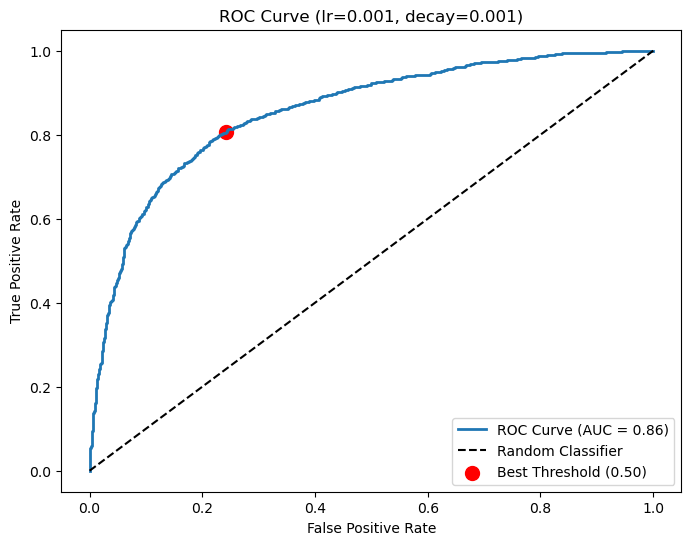

--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.01

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     5  1295     0  0.503260   0.502306  1.000000   
4        0.20  1307    25  1275     0  0.510932   0.506197  1.000000   
5        0.25  1304    81  1219     3  0.531262   0.516845  0.997705   
6        0.30  1294   201  1099    13  0.573456   0.540744  0.990054   
7        0.35  1267   361   939    40  0.624473   0.574343  0.969396   
8        0.40  1218   585   715    89  0.691600   0.630109  0.931905   
9        0.45  1144   779   521   163  0.737629   0.687087  0.875287   
10       0.50  1046   963   337   261  0.7

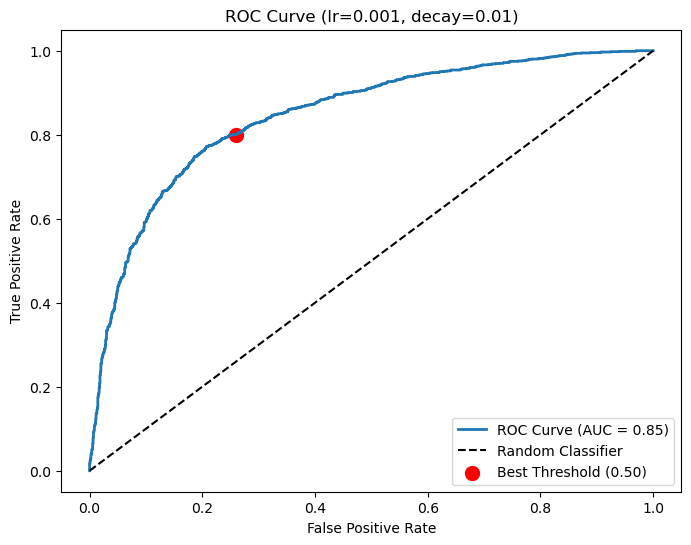

--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     5  1295     0  0.503260   0.502306  1.000000   
8        0.40  1306    40  1260     1  0.516302   0.508963  0.999235   
9        0.45  1277   278  1022    30  0.596471   0.555459  0.977047   
10       0.50  1139   782   518   168  0.73

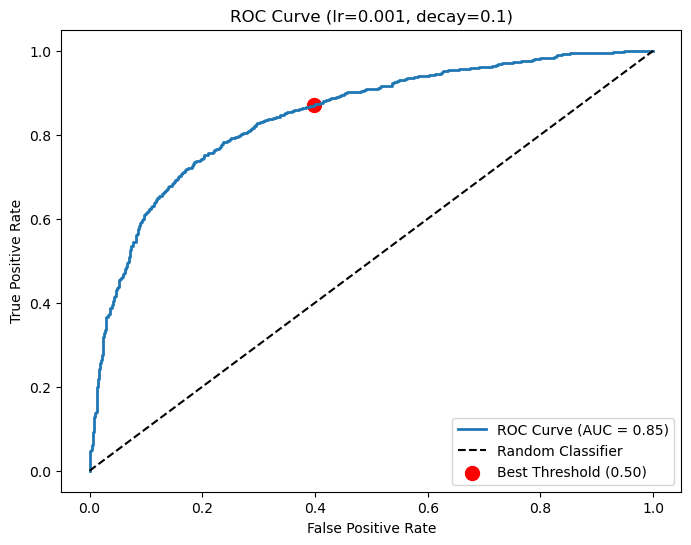

--------------------------------------------------

Evaluating model with lr=0.001 and decay=1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     0  1300     0  0.501343   0.501343  1.000000   
8        0.40  1307     0  1300     0  0.501343   0.501343  1.000000   
9        0.45  1307     0  1300     0  0.501343   0.501343  1.000000   
10       0.50  1301   141  1159     6  0.5531

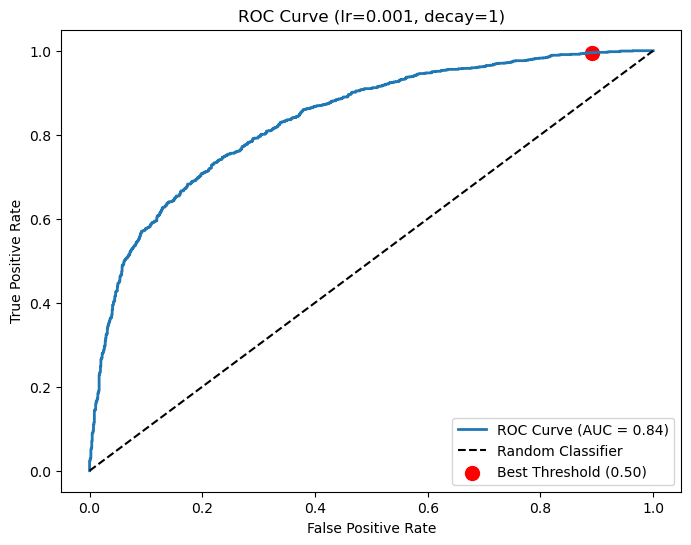

--------------------------------------------------

Evaluating model with lr=0.01 and decay=0.001

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1306    62  1238     1  0.524741   0.513365  0.999235   
2        0.10  1299   199  1101     8  0.574607   0.541250  0.993879   
3        0.15  1284   339   961    23  0.622555   0.571938  0.982402   
4        0.20  1253   456   844    54  0.655543   0.597520  0.958684   
5        0.25  1226   588   712    81  0.695819   0.632611  0.938026   
6        0.30  1194   700   600   113  0.726506   0.665552  0.913542   
7        0.35  1164   789   511   143  0.749137   0.694925  0.890589   
8        0.40  1117   874   426   190  0.763713   0.723914  0.854629   
9        0.45  1074   956   344   233  0.778673   0.757405  0.821729   
10       0.50  1023  1023   277   284  0.7

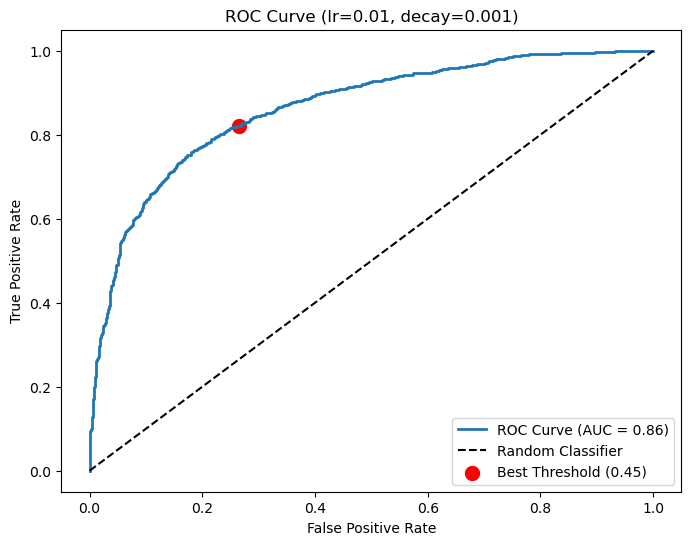

--------------------------------------------------

Evaluating model with lr=0.01 and decay=0.01

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     9  1291     0  0.504795   0.503079  1.000000   
3        0.15  1306    50  1250     1  0.520138   0.510955  0.999235   
4        0.20  1300   157  1143     7  0.558880   0.532133  0.994644   
5        0.25  1289   274  1026    18  0.599540   0.556803  0.986228   
6        0.30  1265   411   889    42  0.642885   0.587279  0.967865   
7        0.35  1226   574   726    81  0.690449   0.628074  0.938026   
8        0.40  1178   741   559   129  0.736095   0.678181  0.901301   
9        0.45  1118   869   431   189  0.762179   0.721756  0.855394   
10       0.50  1046  1011   289   261  0.78

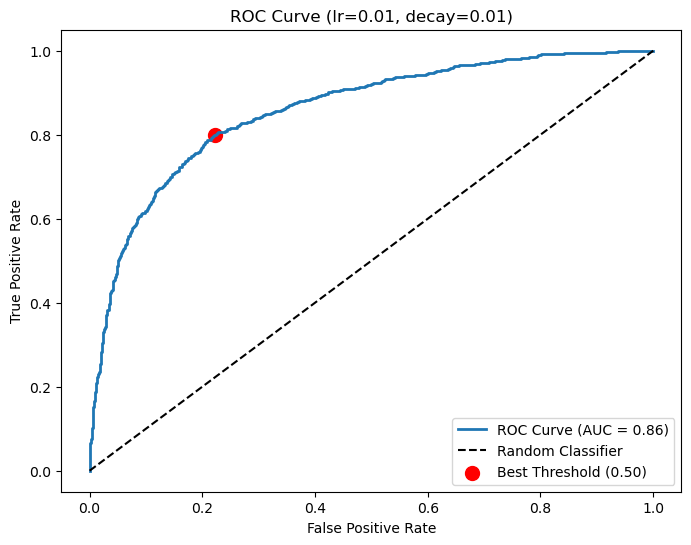

--------------------------------------------------

Evaluating model with lr=0.01 and decay=0.1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     5  1295     0  0.503260   0.502306  1.000000   
8        0.40  1305    46  1254     2  0.518220   0.509965  0.998470   
9        0.45  1272   310   990    35  0.606828   0.562334  0.973221   
10       0.50  1119   825   475   188  0.745

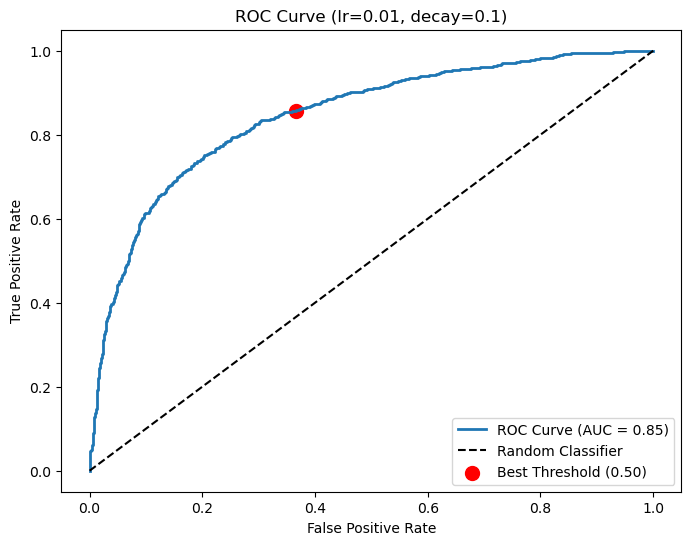

--------------------------------------------------

Evaluating model with lr=0.01 and decay=1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     0  1300     0  0.501343   0.501343  1.000000   
8        0.40  1307     0  1300     0  0.501343   0.501343  1.000000   
9        0.45  1307     0  1300     0  0.501343   0.501343  1.000000   
10       0.50  1301   144  1156     6  0.55427

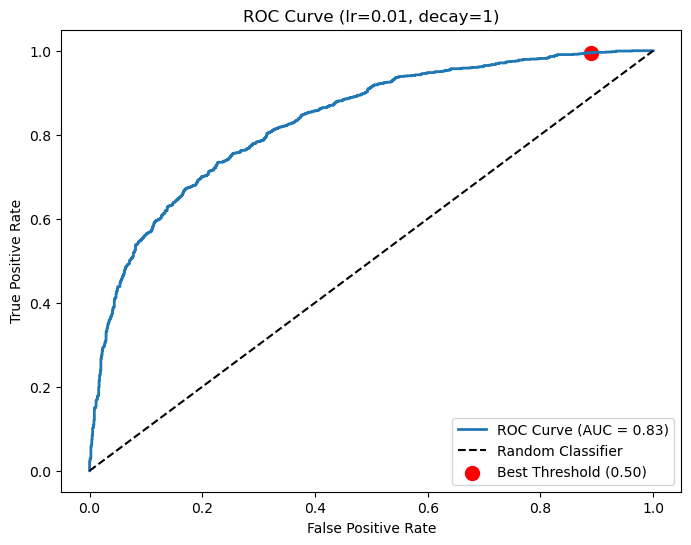

--------------------------------------------------

Evaluating model with lr=0.1 and decay=0.001

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1305    68  1232     2  0.526659   0.514387  0.998470   
2        0.10  1297   212  1088    10  0.578826   0.543816  0.992349   
3        0.15  1283   341   959    24  0.622938   0.572257  0.981637   
4        0.20  1254   451   849    53  0.654008   0.596291  0.959449   
5        0.25  1228   582   718    79  0.694285   0.631038  0.939556   
6        0.30  1201   684   616   106  0.723053   0.660980  0.918898   
7        0.35  1169   780   520   138  0.747603   0.692126  0.894415   
8        0.40  1123   867   433   184  0.763329   0.721722  0.859220   
9        0.45  1086   943   357   221  0.778289   0.752599  0.830910   
10       0.50  1036  1013   287   271  0.78

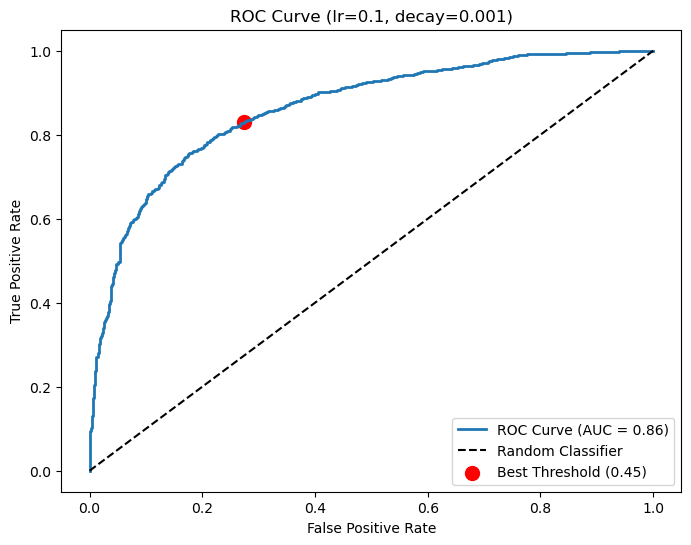

--------------------------------------------------

Evaluating model with lr=0.1 and decay=0.01

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     7  1293     0  0.504028   0.502692  1.000000   
3        0.15  1306    39  1261     1  0.515919   0.508765  0.999235   
4        0.20  1301   131  1169     6  0.549290   0.526721  0.995409   
5        0.25  1297   247  1053    10  0.592252   0.551915  0.992349   
6        0.30  1270   381   919    37  0.633295   0.580174  0.971691   
7        0.35  1232   536   764    75  0.678174   0.617234  0.942617   
8        0.40  1188   701   599   119  0.724588   0.664801  0.908952   
9        0.45  1142   830   470   165  0.756425   0.708437  0.873757   
10       0.50  1065   978   322   242  0.783

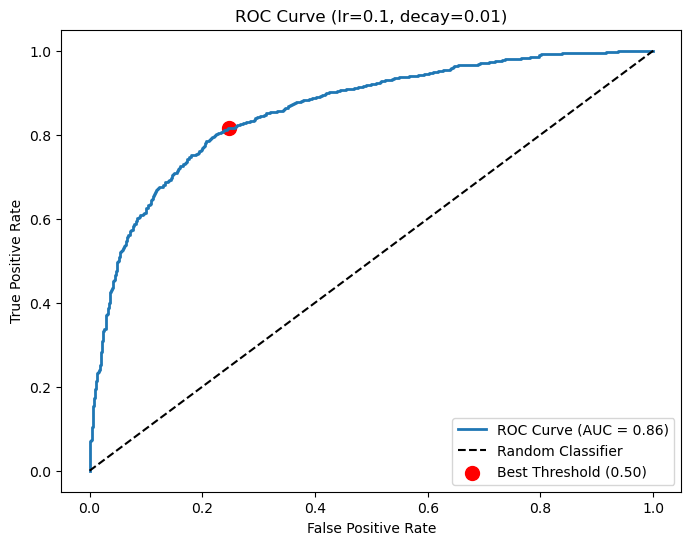

--------------------------------------------------

Evaluating model with lr=0.1 and decay=0.1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     0  1300     0  0.501343   0.501343  1.000000   
8        0.40  1307    22  1278     0  0.509781   0.505609  1.000000   
9        0.45  1299   163  1137     8  0.560798   0.533251  0.993879   
10       0.50  1225   550   750    82  0.6808

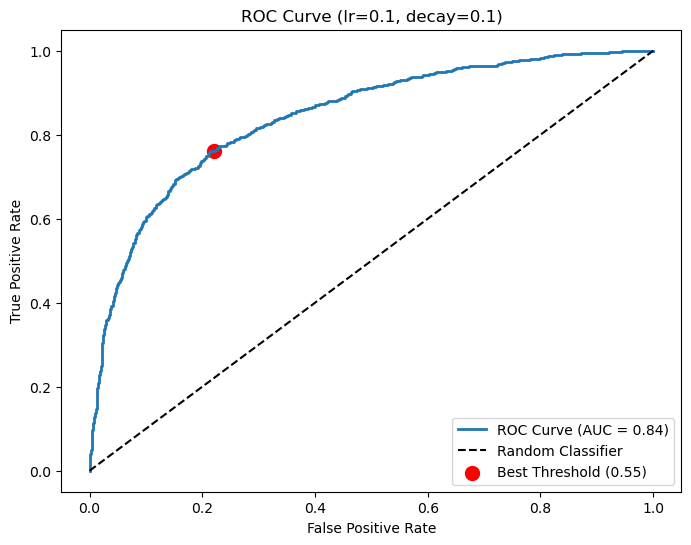

--------------------------------------------------

Evaluating model with lr=0.1 and decay=1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     0  1300     0  0.501343   0.501343  1.000000   
8        0.40  1307     0  1300     0  0.501343   0.501343  1.000000   
9        0.45  1307     0  1300     0  0.501343   0.501343  1.000000   
10       0.50   536  1223    77   771  0.674722

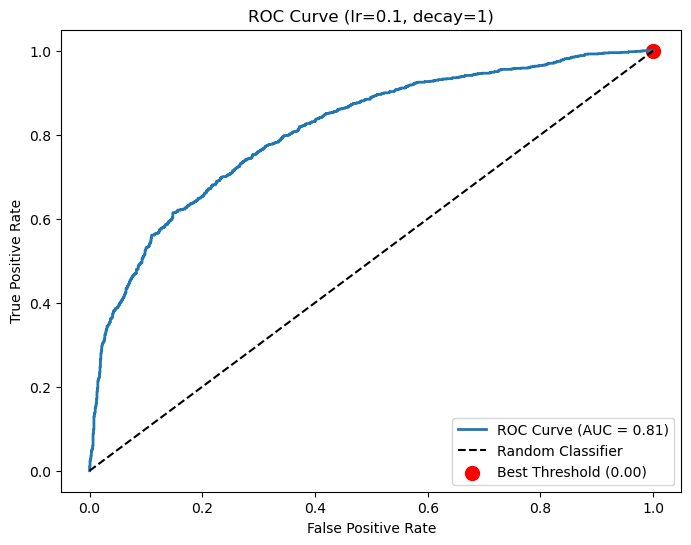

--------------------------------------------------

Evaluating model with lr=1 and decay=0.001

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1303    92  1208     4  0.535098   0.518917  0.996940   
2        0.10  1296   245  1055    11  0.591101   0.551255  0.991584   
3        0.15  1268   377   923    39  0.630993   0.578731  0.970161   
4        0.20  1240   521   779    67  0.675489   0.614165  0.948738   
5        0.25  1208   642   658    99  0.709628   0.647374  0.924254   
6        0.30  1178   754   546   129  0.741082   0.683295  0.901301   
7        0.35  1136   842   458   171  0.758727   0.712673  0.869166   
8        0.40  1096   920   380   211  0.773303   0.742547  0.838562   
9        0.45  1047  1000   300   260  0.785194   0.777283  0.801071   
10       0.50  1004  1043   257   303  0.7851

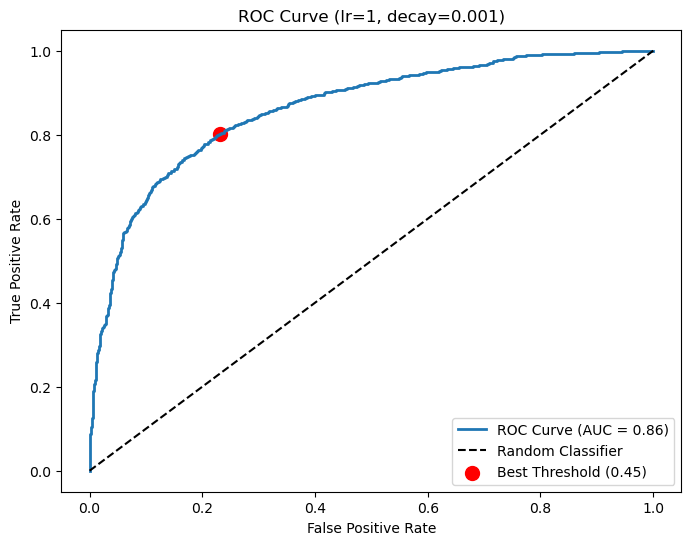

--------------------------------------------------

Evaluating model with lr=1 and decay=0.01

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     2  1298     0  0.502110   0.501727  1.000000   
2        0.10  1307    23  1277     0  0.510165   0.505805  1.000000   
3        0.15  1300   117  1183     7  0.543537   0.523560  0.994644   
4        0.20  1291   255  1045    16  0.593019   0.552654  0.987758   
5        0.25  1259   427   873    48  0.646720   0.590525  0.963275   
6        0.30  1211   619   681    96  0.701956   0.640063  0.926549   
7        0.35  1160   778   522   147  0.743383   0.689655  0.887529   
8        0.40  1083   934   366   224  0.773686   0.747412  0.828615   
9        0.45  1004  1047   253   303  0.786728   0.798727  0.768171   
10       0.50   903  1124   176   404  0.77752

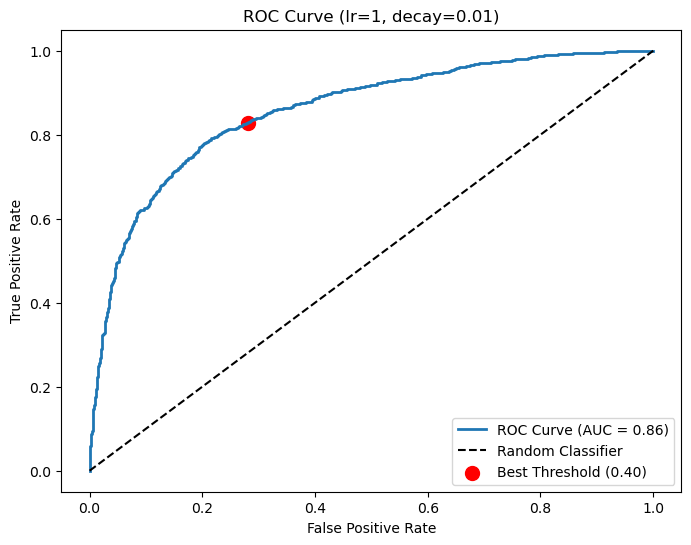

--------------------------------------------------

Evaluating model with lr=1 and decay=0.1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1307     0  1300     0  0.501343   0.501343  1.000000   
6        0.30  1307     0  1300     0  0.501343   0.501343  1.000000   
7        0.35  1307     0  1300     0  0.501343   0.501343  1.000000   
8        0.40  1307     0  1300     0  0.501343   0.501343  1.000000   
9        0.45  1307     0  1300     0  0.501343   0.501343  1.000000   
10       0.50  1307     0  1300     0  0.501343

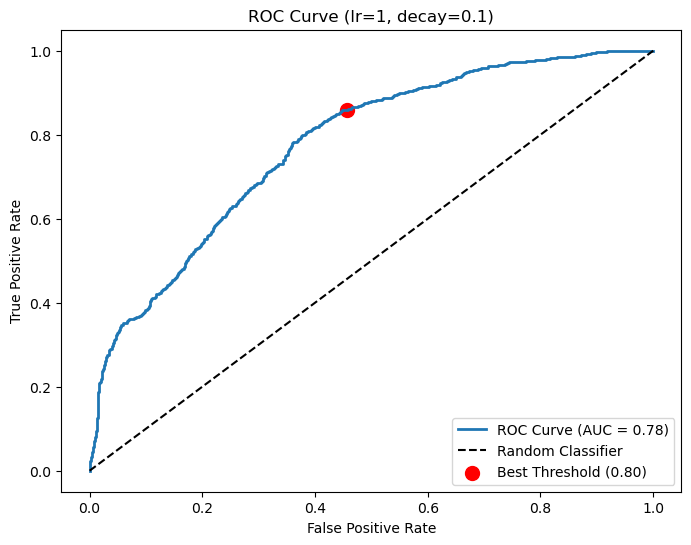

--------------------------------------------------

Evaluating model with lr=1 and decay=1

Evaluation Metrics for Different Thresholds on the Validation Set:
    Threshold    TP    TN    FP    FN  Accuracy  Precision    Recall  \
0        0.00  1307     0  1300     0  0.501343   0.501343  1.000000   
1        0.05  1307     0  1300     0  0.501343   0.501343  1.000000   
2        0.10  1307     0  1300     0  0.501343   0.501343  1.000000   
3        0.15  1307     0  1300     0  0.501343   0.501343  1.000000   
4        0.20  1307     0  1300     0  0.501343   0.501343  1.000000   
5        0.25  1305     0  1300     2  0.500575   0.500960  0.998470   
6        0.30  1165   122  1178   142  0.493671   0.497226  0.891354   
7        0.35   464   593   707   843  0.405447   0.396243  0.355011   
8        0.40    25  1166   134  1282  0.456847   0.157233  0.019128   
9        0.45     0  1300     0  1307  0.498657   0.000000  0.000000   
10       0.50     0  1300     0  1307  0.498657  

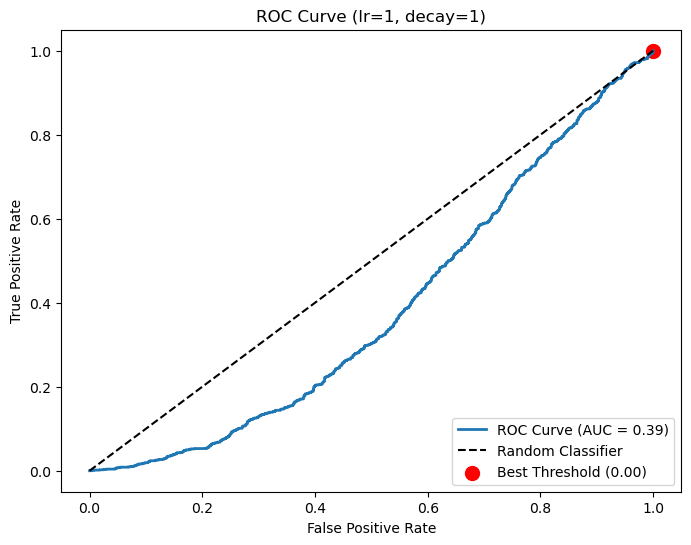

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

###### Define different learning rates and decay values #####
lr_log = [0.001, 0.01, 0.1, 1]
decay_log = [0.001, 0.01, 0.1, 1]

##### Iterate through each combination of learning rate and decay #####
for lr in lr_log:
    for decay in decay_log:
        print("-" * 50)
        print(f"\nEvaluating model with lr={lr} and decay={decay}")
        
        model_log = trained_models_log[(lr, decay)]["model"]
        model_log.eval()
        y_val_proba = []
        
        with torch.no_grad():
            for inputs_val, _ in val_class_loader:
                outputs_val = torch.sigmoid(model_log(inputs_val)).squeeze().numpy()
                y_val_proba.extend(outputs_val)
                
        y_val_proba = np.array(y_val_proba)
        y_val = y_class_val_tensor.numpy().flatten()
        
        Thresholds = np.linspace(0, 1, 21)
        results = []
        
        for Thresh in Thresholds:
            y_val_pred = (y_val_proba >= Thresh).astype(int)
            
            TP = np.sum((y_val == 1) & (y_val_pred == 1))
            TN = np.sum((y_val == 0) & (y_val_pred == 0))
            FP = np.sum((y_val == 0) & (y_val_pred == 1))
            FN = np.sum((y_val == 1) & (y_val_pred == 0))
            
            Accuracy = (TP + TN) / len(y_val)
            Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
            F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
            
            results.append({
                "Threshold": Thresh,
                "TP": TP,
                "TN": TN,
                "FP": FP,
                "FN": FN,
                "Accuracy": Accuracy,
                "Precision": Precision,
                "Recall": Recall,
                "Specificity": Specificity,
                "F1": F1
            })
        
        df_results = pd.DataFrame(results)
        print("\nEvaluation Metrics for Different Thresholds on the Validation Set:")
        print(df_results)
        
        best_threshold_row = df_results.loc[df_results["F1"].idxmax()]
        print("\nBest threshold metrics (based on maximum F1 score):")
        print(best_threshold_row.round(3).to_dict())
        
        fpr, tpr, roc_thresholds = roc_curve(y_val, y_val_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve (lr={lr}, decay={decay})")
        
        plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
        
        y_val_pred_best = (y_val_proba >= best_threshold_row["Threshold"]).astype(int)
        TP_best = np.sum((y_val == 1) & (y_val_pred_best == 1))
        TN_best = np.sum((y_val == 0) & (y_val_pred_best == 0))
        FP_best = np.sum((y_val == 0) & (y_val_pred_best == 1))
        FN_best = np.sum((y_val == 1) & (y_val_pred_best == 0))
        tpr_best = TP_best / (TP_best + FN_best) if (TP_best + FN_best) > 0 else 0
        fpr_best = FP_best / (FP_best + TN_best) if (FP_best + TN_best) > 0 else 0
        
        plt.scatter(fpr_best, tpr_best, color="red", s=100, label=f"Best Threshold ({best_threshold_row['Threshold']:.2f})")
        plt.legend(loc="lower right")
        plt.show()


### Deciding on the Value of Learning Rate and Regularization Parameteres
The best value for Learning Rate is 0.01 and for Regularization Parameter is 0.01. Evaluation metrics for this model is as follows:

- **Threshold: 0.5**
- **TP: 1046 out of 1307**
- **TN: 1011 out of 1300**
- **FP: 289 out of 1300**
- **FN: 261 out of 1307**
- **Accuracy: 0.79**
- **Precision: 0.78**
- **Recall: 0.80**
- **F1: 0.79**
- **AUC: 0.86**
- **Loss: 0.50**

### Prediction
Now that we have our final model with the best hyper-parameters, we can see how well our model predicits new data.


Evaluation Metrics for Different Thresholds on the Test Set:
   Threshold    TP   TN   FP   FN  Accuracy  Precision    Recall  Specificity  \
0        0.5  1067  992  309  239  0.789797   0.775436  0.816998      0.76249   

         F1  
0  0.795675  


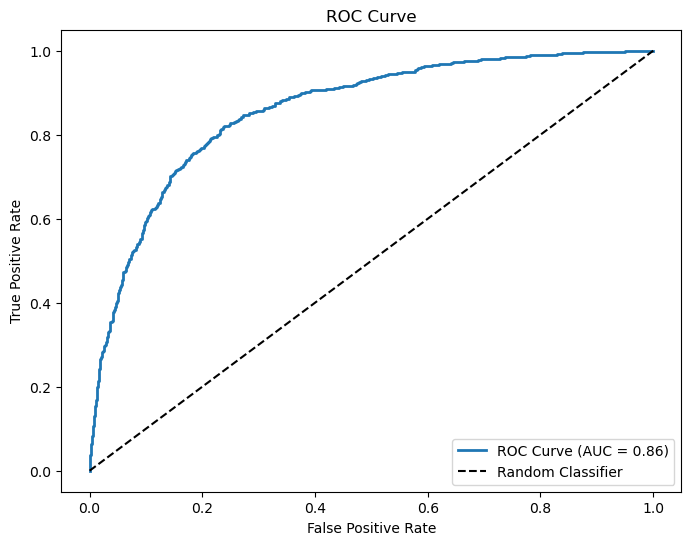

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

best_lr_log = 0.01
best_decay_log = 0.01
best_threshold = 0.5

best_model_log = trained_models_log[(best_lr_log, best_decay_log)]["model"]

best_model_log.eval()
y_test_proba = []

test_class_dataset = TensorDataset(X_class_test_tensor, y_class_test_tensor)
test_class_loader = DataLoader(test_class_dataset, batch_size = 64, shuffle = False)

with torch.no_grad():
    for inputs_test, _ in test_class_loader:
        outputs_test = torch.sigmoid(best_model_log(inputs_test)).squeeze().numpy()
        y_test_proba.extend(outputs_test)
        
y_test_proba = np.array(y_test_proba)
y_test = y_class_test_tensor.numpy().flatten()

Thresholds = np.linspace(0, 1, 21)
results = []

y_test_pred = (y_test_proba >= best_threshold).astype(int)

TP = np.sum((y_test == 1) & (y_test_pred == 1))
TN = np.sum((y_test == 0) & (y_test_pred == 0))
FP = np.sum((y_test == 0) & (y_test_pred == 1))
FN = np.sum((y_test == 1) & (y_test_pred == 0))

Accuracy = (TP + TN) / len(y_test)
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

results.append({
    "Threshold": best_threshold,
    "TP": TP,
    "TN": TN,
    "FP": FP,
    "FN": FN,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "Specificity": Specificity,
    "F1": F1
})

##### Displaying the Values of Metrics for Different Thresholds #####
import pandas as pd
df_results = pd.DataFrame(results)
print("\nEvaluation Metrics for Different Thresholds on the Test Set:")
print(df_results)

##### Plotting ROC Curve and Specifying the Best Threshold Location on the Plot #####
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC = {roc_auc:.2f})", lw = 2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.plot([0, 1], [0, 1], 'k--', label = "Random Classifier")

tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

plt.legend(loc = "lower right")
plt.show()

### Interpretation of the Results
The model achieved an **AUC of 0.86**, indicating a good ability to distinguish between classes. At a **threshold of 0.5**, the evaluation metrics suggest:

- **Accuracy: 0.79** – The overall classification performance is decent.
- **Precision: 0.77** – When the model predicts positive, it is correct about 82% of the time.
- **Recall: 0.82** – The model captures most of the actual positives but may allow some false negatives.
- **Specificity: 0.76** – The model struggles slightly more with correctly identifying negatives.
- **F1 Score: 0.80** – A good balance between precision and recall, indicating a that the model is performing good enough.

## Single Neuron Neural Network (Classification Case - Perceptron)

#### **Introduction**
The **Perceptron** is one of the earliest types of neural networks used for **binary classification**. It is a simple model that makes predictions using a **weighted sum of inputs** followed by a **threshold activation function**.

Unlike **logistic regression**, which uses a **sigmoid activation function**, the **Perceptron** uses a **step function** to decide the output class.

#### **Mathematical Formulation**
The Perceptron makes predictions using:

$$
\hat{y} = f(w x + b)
$$

where:
- $ \hat{y} $ is the predicted output (either 0 or 1),
- $ x $ is the input feature vector,
- $ w $ is the weight vector,
- $ b $ is the bias term (intercept),
- $ f(z) $ is the **step activation function**:

##### **Step Activation Function**
$$
f(z) =
\begin{cases} 
1, & \text{if } z \geq 0 \\
0, & \text{if } z < 0
\end{cases}
$$

#### **Cost Function**
Unlike logistic regression, which uses **Binary Cross-Entropy Loss**, the Perceptron uses a simpler approach for training. It updates weights whenever a **misclassification** occurs.

Instead of optimizing a loss function explicitly, the Perceptron updates its weights based on the error:

$$
\Delta w = \alpha (y - \hat{y}) x
$$

$$
\Delta b = \alpha (y - \hat{y})
$$

where:
- $ \alpha $ is the learning rate,
- $ y $ is the true label (0 or 1),
- $ \hat{y} $ is the predicted label.

#### **Training Using the Perceptron Learning Algorithm**
The **Perceptron Learning Rule** is an iterative algorithm that adjusts the weights until all points are classified correctly (or until a maximum number of iterations is reached).

##### **Steps:**
1. Initialize weights $ w $ and bias $ b $ to small random values.
2. For each training example $(x_i, y_i)$:
   - Compute the weighted sum:  
     $$ z = w x_i + b $$
   - Apply the step activation function to get the predicted label:  
     $$ \hat{y}_i = f(z) $$
   - Update the weights and bias **only if** the prediction is incorrect:
     $$
     w := w + \alpha (y_i - \hat{y}_i) x_i
     $$
     $$
     b := b + \alpha (y_i - \hat{y}_i)
     $$
3. Repeat this process for multiple epochs or until convergence.

#### **Prediction**
After training, we can predict the class of a new input $ x $ using:

$$
\hat{y} = f(w x + b)
$$

where:

$$
\hat{y} =
\begin{cases} 
1, & \text{if } w x + b \geq 0 \\
0, & \text{if } w x + b < 0
\end{cases}
$$

#### **Limitations of the Perceptron**
- The **Perceptron only works for linearly separable data**. If the data is not linearly separable, the model **will not converge**.
- It does **not** output probabilities like logistic regression.
- It cannot model complex decision boundaries.

### Data Prepration
The features and target for each sets of training, validation, and test should be extracted as NumPy arrays and then converted into PyTorch tensors of type float32 for compatibility with PyTorch operations.

In [23]:
import torch

##### Convert the training set to tensors #####
X_perc_train_tensor = torch.tensor(X_perc_train.values, dtype = torch.float32)
y_perc_train_tensor = torch.tensor(y_perc_train.values.reshape(-1, 1), dtype = torch.float32)

##### Convert the validation set to tensors #####
X_perc_val_tensor = torch.tensor(X_perc_val.values, dtype = torch.float32)
y_perc_val_tensor = torch.tensor(y_perc_val.values.reshape(-1, 1), dtype = torch.float32)

##### Convert the test set to tensors #####
X_perc_test_tensor = torch.tensor(X_perc_test.values, dtype = torch.float32)
y_perc_test_tensor = torch.tensor(y_perc_test.values.reshape(-1, 1), dtype = torch.float32)

### Builiding The Network
We use `PyTorch` to create the Neural Network. The following are the steps to create a single neuron network mimicing the linear Linear Classification via Perceptrons. Before going to the details of the training code, mentioning some points seems necessary. We have two hyperparameters the value of which should be decided by the operator. Since, we employed L2 (Ridge) regularization, which is controlled by the regularization coefficient (`weight_decay`), we have to determine the value of this parameter. Alos, another heyperparameter is the learning rate (`lr`).

`weight_decay` is the regularization strength:
- **High values of `weight_decay`:** Stronger regularization, which constrains the weights to be small. This might result in underfitting, where the model is too restricted and performs poorly on both training and test data.
- **Low values of `weight_decay`:** Weaker regularization, which allows weights to become large. This can lead to overfitting, where the model fits the training data very well but performs poorly on unseen test data.

In practice:
- **Underfitting:** Models tend to have high cost values and poor predictions on both training and test sets.
- **Overfitting:** Models show low cost values on the training set but perform significantly worse on the test set.
- **Optimal Model:** Strikes a balance by achieving an acceptable cost value and good predictive accuracy on both training and test sets.

`lr` is the learning rate:
- **High values of `lr`:** Speeds up the learning process and computation of the gradients but at the cost of divergence.
- **Low values of `lr`:** Ensures the convergence and finding the optimal values for model parameters but leads to high running time.

To select the best `weight_decay` and `lr`, we run the model for different values of these two parameters and use loss and other evaluation metrics to choose the best value for these paramaters.


- **DataLoader Setup:**  
  A `TensorDataset` wraps the features and targets. It takes features and target tensors which sharing the same first dimension (the number of samples) and allows them to be treated as a single dataset. This wrapper makes it easy to iterate over the dataset, ensuring that the features and targets are always paired correctly during training. A `DataLoader` provides an efficient way to iterate over the dataset, especially when we need to process the data in mini-batches rather than all at once. This is essential for training with stochastic gradient descent (SGD) or its variants. `batch_size=64` specifies that the data will be split into batches of 64 samples. Instead of processing the entire dataset at once, our model will process 64 samples at a time. `shuffle = True` shuffles the dataset at every epoch ensures that the model doesn't learn the order of the data, which can lead to better generalization. It randomizes the order in which the data is fed into the network in each epoch.
  

- **Neural Network Model with One Neuron:** The `nn.Linear` built-in function of PyTotch is used which accepts the number of input features and the number of output features as the inputs and create a single layer linear network. This function creates a fully-connected linear layer. A linear layer computes the function $y = Xw + b$. 


- **The loss function:** `perceptron_loss` function is defined to compute the loss of the model. `outputs` is the raw output from the perceptron model (the weighted sum of inputs). `targets` is the true labels for the classification task (-1 or 1). `Returns` the average perceptron loss over the batch. Multiplying `targets` with `outputs` serves to measure how well the perceptron is doing. If `targets` and `outputs` have the same sign, the product is positive, indicating a correct classification. If they have opposite signs, the product is negative, meaning a misclassification. `torch.clamp(-targets * outputs, min=0)` is a way to implement this loss function. `torch.clamp()` is a function in PyTorch that limits the values in a tensor to a specified range. It ensures that no values fall below a minimum or above a maximum threshold (here `min = 0` as we don't want negative losses. Recall that, loss in perceptron works in a way that if the prediction is correct the weights do not need to be updated, otherwise they have to be updated and so we have a positive loss. In other words, if the prediction is correct (`targets * outputs` > 0), the loss is 0 (no penalty). If the prediction is incorrect (`targets * outputs` < 0), the loss is positive, proportional to how wrong the model is.
  
  `optim.SGD` is a built-in function performing the Stochastic Gradient Descent (SGD) optimization method. It accepts model parameters (weights and biases), learning rate, and regularization parameter (here L2 or Ridge) as the input. We assign this function to a variable named `optimizer` to call it later in the code during the training process.
  

- **Training Loop:**
  For training we have two loops. The outer loop, loops over the entire training data set and in each loop chooses a mini-batch of size 64. The inner loop, loops over each batch and use the data in that batch to train the model.
  
  `epoch_perc`: An epoch is one full pass over the entire training dataset.
  
  `model_perc.train()`:  It tells PyTorch that the model is in training mode.
  
  `optimizer_perc.zero_grad()`: Before computing the gradients for the current batch, we call this function to clear any gradients that may have been accumulated from previous batches.
  
  `outputs_perc = model_perc(inputs_train)`: Through this model computes the output of each input and put in `output_oerc`. Notice that we do not use `sign` activation function during the training as it is non-defferentiable and we cannot compute the gradients. If we applied `torch.sign(outputs_perc)`, This would completely disrupt gradient-based learning because the `sign` function is non-differentiable at 0 and has a gradient of 0 everywhere else. Also, no useful gradient would be passed to update the weights—causing the model to stop learning.
  
  `loss_perc.backward()`: This initiates the backpropagation process and computes the gradient of the loss with respect to each of the model’s parameters.
  
  `optimizer_perc.step()`: The optimizer updates the model’s parameters using the gradients computed in the previous step.
  
  `running_train_loss += loss_train.item()`: `loss_train.item()` converts the scalar value of the current batch's loss from the PyTorch tensor to the standard Python number. This loss will be added to `running_train_loss`. Then for every 50 epochs, the average loss for tha epoch will be printed to check the progress twoard the optimum location.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

##### Data Loader Setup #####
train_perc_dataset = TensorDataset(X_perc_train_tensor, y_perc_train_tensor)
train_perc_loader = DataLoader(train_perc_dataset, batch_size=64, shuffle=True)

val_perc_dataset = TensorDataset(X_perc_val_tensor, y_perc_val_tensor)
val_perc_loader = DataLoader(val_perc_dataset, batch_size=64, shuffle=False)

##### Number of Input Features #####
input_perc_dim = X_perc_train_tensor.shape[1]

##### Define hyperparameter values to test #####
lr_values = [0.001, 0.01, 0.1, 1]
weight_decay_values = [0.001, 0.01, 0.1, 1]

##### Dictionary to store trained models for each (lr, weight_decay) combination #####
trained_models_perc = {}

##### Perceptron Loss Function #####
def perceptron_loss(outputs, targets):
    return torch.mean(torch.clamp(-targets * outputs, min = 0))

##### Training loop using SGD #####
num_epochs_perc = 200

for lr in lr_values:
    for decay in weight_decay_values:
        print("-" * 50)
        print(f"Training Perceptron model with lr = {lr} and weight_decay = {decay}")
        
        model_perc = nn.Linear(input_perc_dim, 1)
        
        ##### The Loss Function and Optimizer #####
        optimizer_perc = optim.SGD(model_perc.parameters(), lr = lr, weight_decay = decay)
        
        train_losses = []
        val_losses = []
        
        for epoch_perc in range(num_epochs_perc):
            model_perc.train()
            running_train_loss = 0.0
    
            for inputs_train, targets_train in train_perc_loader:
                optimizer_perc.zero_grad()
        
                outputs_perc = model_perc(inputs_train)
                loss_train = perceptron_loss(outputs_perc, targets_train)
            
                loss_train.backward()
                optimizer_perc.step()
        
                running_train_loss += loss_train.item()
            
            ##### Compute average training loss for this epoch #####
            avg_train_loss = running_train_loss / len(train_perc_loader)
            train_losses.append(avg_train_loss)
            
            ##### Now evaluate on the validation set #####
            model_perc.eval()
            running_val_loss = 0.0
            with torch.no_grad():
                for inputs_val, targets_val in val_perc_loader:
                    outputs_val = model_perc(inputs_val)
                    loss_val = perceptron_loss(outputs_val, targets_val)
                    running_val_loss += loss_val.item()
            avg_val_loss = running_val_loss / len(val_perc_loader)
            val_losses.append(avg_val_loss)
    
            if (epoch_perc + 1) % 50 == 0:
                print(f"Epoch [{epoch_perc + 1}/{num_epochs_perc}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        print("Training completed for this combination.\n")
        
        ##### Save the model and its loss histories in the dictionary #####
        trained_models_perc[(lr, decay)] = {
            "model": model_perc,
            "train_losses": train_losses,
            "val_losses": val_losses
        }
        
print("All Perceptron models have been trained and stored.")


--------------------------------------------------
Training Perceptron model with lr = 0.001 and weight_decay = 0.001
Epoch [50/200], Train Loss: 0.0067, Val Loss: 0.0072
Epoch [100/200], Train Loss: 0.0008, Val Loss: 0.0009
Epoch [150/200], Train Loss: 0.0007, Val Loss: 0.0007
Epoch [200/200], Train Loss: 0.0005, Val Loss: 0.0007
Training completed for this combination.

--------------------------------------------------
Training Perceptron model with lr = 0.001 and weight_decay = 0.01
Epoch [50/200], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [100/200], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [150/200], Train Loss: 0.0001, Val Loss: 0.0001
Epoch [200/200], Train Loss: 0.0001, Val Loss: 0.0001
Training completed for this combination.

--------------------------------------------------
Training Perceptron model with lr = 0.001 and weight_decay = 0.1
Epoch [50/200], Train Loss: 0.0009, Val Loss: 0.0012
Epoch [100/200], Train Loss: 0.0001, Val Loss: 0.0001
Epoch [150/200], Train Loss:

### Evaluation Process
The evaluation process is very similar to Logistic Regression with sigmoid function with only two main difference. Firts, for the prediction we use `sign` function which maped our output to either 1 or -1. Second, ROC and AUC are not meaningful here as we do not test different threshholds.

In [25]:
import matplotlib.pyplot as plt

##### Define different learning rates and decay values #####
lr_perc = [0.001, 0.01, 0.1, 1]
decay_perc = [0.001, 0.01, 0.1, 1]

for lr in lr_perc:
    for decay in decay_perc:
        print("-" * 50)
        print(f"\nEvaluating model with lr={lr} and decay={decay}")
        
        model_perc = trained_models_perc[(lr, decay)]["model"]
        model_perc.eval()
        y_val = []
        y_val_pred = []

        val_perc_dataset = TensorDataset(X_perc_val_tensor, y_perc_val_tensor)
        val_perc_loader = DataLoader(val_perc_dataset, batch_size=64, shuffle=False)

        with torch.no_grad():
            for inputs_val, targets_val in val_perc_loader:
                outputs_val = model_perc(inputs_val)
                predictions = torch.sign(outputs_val).numpy().flatten()
                y_val.extend(targets_val.numpy().flatten())
                y_val_pred.extend(predictions)
        
        results = []
        y_val_np = np.array(y_val)
        y_val_pred_np = np.array(y_val_pred)
        
        TP = np.sum((y_val_np == 1) & (y_val_pred_np == 1))
        TN = np.sum((y_val_np == -1) & (y_val_pred_np == -1))
        FP = np.sum((y_val_np == -1) & (y_val_pred_np == 1))
        FN = np.sum((y_val_np == 1) & (y_val_pred_np == -1))

        Accuracy = (TP + TN) / len(y_val_np) if len(y_val_np) > 0 else 0
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

        results.append({
            "TP": TP,
            "TN": TN,
            "FP": FP,
            "FN": FN,
            "Accuracy": Accuracy,
            "Precision": Precision,
            "Recall": Recall,
            "Specificity": Specificity,
            "F1": F1
        })

        df_results = pd.DataFrame(results)
        print("\nEvaluation Metrics on the Validation Set:")
        print(df_results.round(3))


--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.001

Evaluation Metrics on the Validation Set:
     TP   TN   FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  1129  691  609  178     0.698       0.65   0.864        0.532  0.742
--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.01

Evaluation Metrics on the Validation Set:
    TP    TN  FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  448  1270  30  859     0.659      0.937   0.343        0.977  0.502
--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.1

Evaluation Metrics on the Validation Set:
     TP    TN   FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  1006  1012  288  301     0.774      0.777    0.77        0.778  0.774
--------------------------------------------------

Evaluating model with lr=0.001 and decay=1

Evaluation Metrics on the Validation Set:
     TP

### Deciding on the Value of Learning Rate and Regularization Parameteres
The best value for Learning Rate is 0.01 and for Regularization Parameter is 0.001. Evaluation metrics for this model is as follows:

- **TP: 1127 out of 1307**
- **TN: 892 out of 1300**
- **FP: 408 out of 1300**
- **FN: 180 out of 1307**
- **Accuracy: 0.77**
- **Precision: 0.73**
- **Recall: 0.86**
- **F1: 0.79**
- **Loss: 0**

### Prediction
Now that we have our final model with the best hyper-parameters, we can see how well our model predicits new data.

In [30]:
import matplotlib.pyplot as plt

best_lr_perc = 0.01
best_decay_perc = 0.001
        
best_model_perc = trained_models_perc[(best_lr_perc, best_decay_perc)]["model"]
best_model_perc.eval()
y_test = []
y_test_pred = []

test_perc_dataset = TensorDataset(X_perc_test_tensor, y_perc_test_tensor)
test_perc_loader = DataLoader(test_perc_dataset, batch_size=64, shuffle=False)

with torch.no_grad():
    for inputs_test, targets_test in test_perc_loader:
        outputs_test = best_model_perc(inputs_test)
        predictions = torch.sign(outputs_test).numpy().flatten()
        y_test.extend(targets_test.numpy().flatten())
        y_test_pred.extend(predictions)

results = []
y_test_np = np.array(y_test)
y_test_pred_np = np.array(y_test_pred)

TP = np.sum((y_test_np == 1) & (y_test_pred_np == 1))
TN = np.sum((y_test_np == -1) & (y_test_pred_np == -1))
FP = np.sum((y_test_np == -1) & (y_test_pred_np == 1))
FN = np.sum((y_test_np == 1) & (y_test_pred_np == -1))

Accuracy = (TP + TN) / len(y_test_np) if len(y_test_np) > 0 else 0
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

results.append({
    "TP": TP,
    "TN": TN,
    "FP": FP,
    "FN": FN,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "Specificity": Specificity,
    "F1": F1
})

df_results = pd.DataFrame(results)
print("\nEvaluation Metrics on the Test Set:")
print(df_results.round(3))



Evaluation Metrics on the Test Set:
     TP   TN   FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  1139  901  400  167     0.783       0.74   0.872        0.693  0.801


### Interpretation of the Results
The evaluation metrics suggest:

- **Accuracy: 0.78** – The overall classification performance is decent.
- **Precision: 0.74** – When the model predicts positive, it is correct about 87% of the time.
- **Recall: 0.87** – The model captures most of the actual positives but may allow some false negatives.
- **Specificity: 0.69** – TThe model captures most of the actual negatives but may allow some false positives.
- **F1 Score: 0.80** – A good balance between precision and recall, indicating a that the model is performing good enough.

## Single Neuron Neural Network (Classification Case - Linear Support Vector Machines)

#### **Introduction**
Support Vector Machines (SVM) is a **powerful classification algorithm** that finds an optimal **decision boundary** to separate data points of different classes. Unlike logistic regression, which optimizes a probability-based loss function, **SVMs aim to maximize the margin** between two classes, leading to better generalization.

A **linear SVM** is used when the data is linearly separable, meaning that a straight line (or a hyperplane in higher dimensions) can separate the classes.

#### **Mathematical Formulation**
The decision function of a **linear SVM** is given by:

$$
f(x) = w^T x + b
$$

where:
- $( x )$ is the input feature vector,
- $( w )$ is the weight vector (also called the normal to the hyperplane),
- $( b )$ is the bias term.

The classifier assigns labels as:

$
\hat{y} = \text{sign}(w^T x + b)
$

where:
- If $( w^T x + b \geq 0 )$, predict class **+1**.
- If $( w^T x + b < 0 )$, predict class **-1**.

#### **Margin and Support Vectors**
The goal of SVM is to find a **hyperplane** that maximizes the margin between the closest data points of both classes. These closest points are called **support vectors**.

- The margin is the distance between the hyperplane and the nearest support vectors.
- A **larger margin** leads to **better generalization**.

The margin is defined as:

$
\frac{2}{\|w\|}
$

#### **Optimization Problem**
The objective of **hard-margin SVM** (when data is perfectly separable) is to maximize the margin by solving:

$
\min_{w, b} \frac{1}{2} \|w\|^2
$

subject to:

$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$

where $( y_i \in \{-1,1\} )$ represents class labels.

#### **Soft-Margin SVM (Handling Non-Separable Data)**
When data is **not perfectly separable**, we introduce slack variables $( \xi_i )$ to allow misclassification. The optimization problem becomes:

$
\min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} \xi_i
$

subject to:

$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
$

where:
- $( C )$ is a **regularization parameter** that controls the trade-off between **margin size** and **misclassification**.
- Larger $( C )$ → **Lower tolerance** for misclassification.
- Smaller $( C )$ → **Larger margin but more misclassification allowed**.

#### **Cost Function (Hinge Loss)**
To optimize SVM, we use the **hinge loss function**:

$
J(w, b) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} \max(0, 1 - y_i (w^T x_i + b))
$

The **hinge loss** ensures that:
- If $( y_i (w^T x_i + b) \geq 1 )$, loss = **0** (correct classification).
- If $( y_i (w^T x_i + b) < 1 )$, loss is proportional to how far the prediction is from being correct.

#### **Gradient Descent for SVM**
We use **gradient descent** (or more commonly **Stochastic Gradient Descent (SGD)**) to optimize SVM parameters.

#### **Gradient Computation**
For hinge loss, the gradients are:

$
\frac{\partial J}{\partial w} =
\begin{cases}
w, & \text{if } y_i (w^T x_i + b) \geq 1 \\
w - C y_i x_i, & \text{if } y_i (w^T x_i + b) < 1
\end{cases}
$

$
\frac{\partial J}{\partial b} =
\begin{cases}
0, & \text{if } y_i (w^T x_i + b) \geq 1 \\
- C y_i, & \text{if } y_i (w^T x_i + b) < 1
\end{cases}
$

#### **Parameter Update Rule**
Using a learning rate $( \alpha )$, we update parameters iteratively:

$
w := w - \alpha \frac{\partial J}{\partial w}
$

$
b := b - \alpha \frac{\partial J}{\partial b}
$

This continues until convergence.

#### **Prediction**
After training, we classify a new input \( x \) using:

$
\hat{y} = \text{sign}(w^T x + b)
$

which assigns either **+1** or **-1** as the predicted class.

### Builiding The Network
We use `PyTorch` to create the Neural Network. The following are the steps to create a single neuron network mimicing the Linear Classification via Support Vector Machines. Before going to the details of the training code, mentioning some points seems necessary. We have two hyperparameters the value of which should be decided by the operator. Since, we employed L2 (Ridge) regularization, which is controlled by the regularization coefficient (`weight_decay`), we have to determine the value of this parameter. Alos, another heyperparameter is the learning rate (`lr`).

`weight_decay` is the regularization strength:
- **High values of `weight_decay`:** Stronger regularization, which constrains the weights to be small. This might result in underfitting, where the model is too restricted and performs poorly on both training and test data.
- **Low values of `weight_decay`:** Weaker regularization, which allows weights to become large. This can lead to overfitting, where the model fits the training data very well but performs poorly on unseen test data.

In practice:
- **Underfitting:** Models tend to have high cost values and poor predictions on both training and test sets.
- **Overfitting:** Models show low cost values on the training set but perform significantly worse on the test set.
- **Optimal Model:** Strikes a balance by achieving an acceptable cost value and good predictive accuracy on both training and test sets.

`lr` is the learning rate:
- **High values of `lr`:** Speeds up the learning process and computation of the gradients but at the cost of divergence.
- **Low values of `lr`:** Ensures the convergence and finding the optimal values for model parameters but leads to high running time.

To select the best `weight_decay` and `lr`, we run the model for different values of these two parameters and use loss and other evaluation metrics to choose the best value for these paramaters.


- **DataLoader Setup:**  
  A `TensorDataset` wraps the features and targets. It takes features and target tensors which sharing the same first dimension (the number of samples) and allows them to be treated as a single dataset. This wrapper makes it easy to iterate over the dataset, ensuring that the features and targets are always paired correctly during training. A `DataLoader` provides an efficient way to iterate over the dataset, especially when we need to process the data in mini-batches rather than all at once. This is essential for training with stochastic gradient descent (SGD) or its variants. `batch_size=64` specifies that the data will be split into batches of 64 samples. Instead of processing the entire dataset at once, our model will process 64 samples at a time. `shuffle = True` shuffles the dataset at every epoch ensures that the model doesn't learn the order of the data, which can lead to better generalization. It randomizes the order in which the data is fed into the network in each epoch.
  

- **Neural Network Model with One Neuron:** The `nn.Linear` built-in function of PyTotch is used which accepts the number of input features and the number of output features as the inputs and create a single layer linear network. This function creates a fully-connected linear layer. A linear layer computes the function $y = Xw + b$. 


- **The loss function and optimizer:** `hinge_loss` function is defined to compute the loss of the model. `outputs` is the raw output from the SVM model (the weighted sum of inputs). `targets` is the true labels for the classification task (-1 or 1). `Returns` the average hinge loss over the batch. Multiplying `targets` with `outputs` nad subtract it from 1 serves to measure how well the SVM is doing. For correctly classified samples $( y \cdot f(x) \geq 1 )$: The value of $( 1 - y \cdot f(x) )$ is **negative or zero**. These points are correctly classified and have a sufficient margin → **no loss**. For incorrectly classified or near-boundary samples $( y \cdot f(x) < 1 )$: The value of $( 1 - y \cdot f(x) )$ is **positive**. These points contribute to the **loss** because they are either misclassified or within the margin.  `torch.clamp(-targets * outputs, min=0)` is a way to implement this loss function. `torch.clamp()` is a function in PyTorch that limits the values in a tensor to a specified range. It ensures that no values fall below a minimum or above a maximum threshold (here `min = 0` as we don't want negative losses. Recall that, loss in SVM works in a way that if the prediction is correct the weights do not need to be updated, in other words, these points are not contributed in weight update process (they are not support vectors), otherwise they have to be updated and so we have a positive loss. In other words, if the prediction is correct (`1 - targets * outputs` < 0), the loss is 0 (no penalty). If the prediction is incorrect (`1 - targets * outputs` > 0), the loss is the loss is proportional to the margin violation.
  
  `optim.SGD` is a built-in function performing the Stochastic Gradient Descent (SGD) optimization method. It accepts model parameters (weights and biases), learning rate, and regularization parameter (here L2 or Ridge) as the input. We assign this function to a variable named `optimizer` to call it later in the code during the training process.
  

- **Training Loop:**
  For training we have two loops. The outer loop, loops over the entire training data set and in each loop chooses a mini-batch of size 64. The inner loop, loops over each batch and use the data in that batch to train the model.
  
  `epoch_class`: An epoch is one full pass over the entire training dataset.
  
  `model_class.train()`:  It tells PyTorch that the model is in training mode.
  
  `optimizer_class.zero_grad()`: Before computing the gradients for the current batch, we call this function to clear any gradients that may have been accumulated from previous batches.
  
  `outputs_svm = model_svm(inputs_train)`: Through this model computes the output of each input and put in `output_svm`. Notice that we do not use `sign` activation function during the training as it is non-defferentiable and we cannot compute the gradients. If we applied `torch.sign(outputs_svm)`, This would completely disrupt gradient-based learning because the `sign` function is non-differentiable at 0 and has a gradient of 0 everywhere else. Also, no useful gradient would be passed to update the weights—causing the model to stop learning.
  
  `loss_class.backward()`: This initiates the backpropagation process and computes the gradient of the loss with respect to each of the model’s parameters.
  
  `optimizer_class.step()`: The optimizer updates the model’s parameters using the gradients computed in the previous step.
  
  `running_train_loss += loss_train.item()`: `loss_train.item()` converts the scalar value of the current batch's loss from the PyTorch tensor to the standard Python number. This loss will be added to `running_train_loss`. Then for every 50 epochs, the average loss for tha epoch will be printed to check the progress twoard the optimum location. 

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

##### Data Loader Setup #####
train_svm_dataset = TensorDataset(X_perc_train_tensor, y_perc_train_tensor)
train_svm_loader = DataLoader(train_svm_dataset, batch_size=64, shuffle=True)

val_svm_dataset = TensorDataset(X_perc_val_tensor, y_perc_val_tensor)
val_svm_loader = DataLoader(val_svm_dataset, batch_size=64, shuffle=False)

##### Number of Input Features #####
input_svm_dim = X_perc_train_tensor.shape[1]

##### Define hyperparameter values to test #####
lr_values = [0.001, 0.01, 0.1, 1]
weight_decay_values = [0.001, 0.01, 0.1, 1]

##### Dictionary to store trained models for each (lr, weight_decay) combination #####
trained_models_svm = {}

##### SVM Hinge Loss Function #####
def hinge_loss(outputs, targets):
    return torch.mean(torch.clamp(1 - targets * outputs, min=0))

##### Training loop using SGD #####
num_epochs_svm = 300

for lr in lr_values:
    for decay in weight_decay_values:
        print("-" * 50)
        print(f"Training SVM model with lr = {lr} and weight_decay = {decay}")
        
        model_svm = nn.Linear(input_svm_dim, 1)
        
        ##### The Loss Function and Optimizer #####
        optimizer_svm = optim.SGD(model_svm.parameters(), lr=lr, weight_decay=decay)
        
        train_losses = []
        val_losses = []
        
        for epoch_svm in range(num_epochs_svm):
            model_svm.train()
            running_train_loss = 0.0
    
            for inputs_train, targets_train in train_svm_loader:
                optimizer_svm.zero_grad()
        
                outputs_svm = model_svm(inputs_train)
                loss_train = hinge_loss(outputs_svm, targets_train)
            
                loss_train.backward()
                optimizer_svm.step()
        
                running_train_loss += loss_train.item()
            
            ##### Compute average training loss for this epoch #####
            avg_train_loss = running_train_loss / len(train_svm_loader)
            train_losses.append(avg_train_loss)
            
            ##### Now evaluate on the validation set #####
            model_svm.eval()
            running_val_loss = 0.0
            with torch.no_grad():
                for inputs_val, targets_val in val_svm_loader:
                    outputs_val = model_svm(inputs_val)
                    loss_val = hinge_loss(outputs_val, targets_val)
                    running_val_loss += loss_val.item()
            avg_val_loss = running_val_loss / len(val_svm_loader)
            val_losses.append(avg_val_loss)
    
            if (epoch_svm + 1) % 50 == 0:
                print(f"Epoch [{epoch_svm + 1}/{num_epochs_svm}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        print("Training completed for this combination.\n")
        
        ##### Count correctly classified, margin, near-margin, and misclassified points #####
        model_svm.eval()
        with torch.no_grad():
            correct_far = 0
            on_margin = 0
            near_margin = 0
            misclassified = 0
            
            for inputs_train, targets_train in train_svm_loader:
                outputs_train = model_svm(inputs_train)
                margins_train = targets_train * outputs_train
                
                correct_far += (margins_train > 1).sum().item()
                on_margin += (margins_train == 1).sum().item()
                near_margin += ((margins_train > 0) & (margins_train < 1)).sum().item()
                misclassified += (margins_train <= 0).sum().item()
            
            print(f"For lr = {lr}, weight_decay = {decay}:")
            print(f"Correctly classified (far from margin): {correct_far}")
            print(f"On margin: {on_margin}")
            print(f"Correct but close to margin: {near_margin}")
            print(f"Misclassified: {misclassified}\n")
        
        ##### Save the model and its loss histories in the dictionary #####
        trained_models_svm[(lr, decay)] = {
            "model": model_svm,
            "train_losses": train_losses,
            "val_losses": val_losses
        }
        
print("All SVM models have been trained and stored.")


--------------------------------------------------
Training SVM model with lr = 0.001 and weight_decay = 0.001
Epoch [50/300], Train Loss: 0.7196, Val Loss: 0.7155
Epoch [100/300], Train Loss: 0.5908, Val Loss: 0.5903
Epoch [150/300], Train Loss: 0.5502, Val Loss: 0.5506
Epoch [200/300], Train Loss: 0.5372, Val Loss: 0.5342
Epoch [250/300], Train Loss: 0.5279, Val Loss: 0.5257
Epoch [300/300], Train Loss: 0.5223, Val Loss: 0.5205
Training completed for this combination.

For lr = 0.001, weight_decay = 0.001:
Correctly classified (far from margin): 4833
On margin: 0
Correct but close to margin: 4776
Misclassified: 2556

--------------------------------------------------
Training SVM model with lr = 0.001 and weight_decay = 0.01
Epoch [50/300], Train Loss: 0.7089, Val Loss: 0.7068
Epoch [100/300], Train Loss: 0.6018, Val Loss: 0.6013
Epoch [150/300], Train Loss: 0.5634, Val Loss: 0.5635
Epoch [200/300], Train Loss: 0.5511, Val Loss: 0.5483
Epoch [250/300], Train Loss: 0.5427, Val Loss: 0

Epoch [100/300], Train Loss: 0.5755, Val Loss: 0.6015
Epoch [150/300], Train Loss: 0.5675, Val Loss: 0.5688
Epoch [200/300], Train Loss: 0.5815, Val Loss: 0.5506
Epoch [250/300], Train Loss: 0.5726, Val Loss: 0.5423
Epoch [300/300], Train Loss: 0.5646, Val Loss: 0.5515
Training completed for this combination.

For lr = 1, weight_decay = 0.01:
Correctly classified (far from margin): 4356
On margin: 0
Correct but close to margin: 5101
Misclassified: 2708

--------------------------------------------------
Training SVM model with lr = 1 and weight_decay = 0.1
Epoch [50/300], Train Loss: 0.7644, Val Loss: 0.8546
Epoch [100/300], Train Loss: 0.7737, Val Loss: 1.0757
Epoch [150/300], Train Loss: 0.7632, Val Loss: 0.7373
Epoch [200/300], Train Loss: 0.7778, Val Loss: 1.2960
Epoch [250/300], Train Loss: 0.7757, Val Loss: 0.8508
Epoch [300/300], Train Loss: 0.7748, Val Loss: 1.5508
Training completed for this combination.

For lr = 1, weight_decay = 0.1:
Correctly classified (far from margin): 

### Evaluation Process
The evaluation process is very similar to Perceptron with sigmoid function with only two main difference. Moreover, we consider the misclassified, correcty classified, and near margins points in our evaluation as well as other metrics and loss.

In [28]:
import matplotlib.pyplot as plt

# Define different learning rates and decay values
lr_svm = [0.001, 0.01, 0.1, 1]
decay_svm = [0.001, 0.01, 0.1, 1]

for lr in lr_svm:
    for decay in decay_svm:
        print("-" * 50)
        print(f"\nEvaluating model with lr={lr} and decay={decay}")
        
        model_svm = trained_models_svm[(lr, decay)]["model"]
        model_svm.eval()
        y_val = []
        y_val_pred = []

        val_svm_dataset = TensorDataset(X_perc_val_tensor, y_perc_val_tensor)
        val_svm_loader = DataLoader(val_perc_dataset, batch_size = 64, shuffle = False)

        with torch.no_grad():
            
            correct_far = 0
            on_margin = 0
            near_margin = 0
            misclassified = 0
            
            for inputs_val, targets_val in val_svm_loader:
                outputs_val = model_svm(inputs_val)
                margins_val = targets_val * outputs_val
                
                correct_far += (margins_val > 1).sum().item()
                on_margin += (margins_val == 1).sum().item()
                near_margin += ((margins_val > 0) & (margins_val < 1)).sum().item()
                misclassified += (margins_val <= 0).sum().item()
                
                predictions = torch.sign(outputs_val).numpy().flatten()
                y_val.extend(targets_val.numpy().flatten())
                y_val_pred.extend(predictions)
            
            print(f"For lr = {lr}, weight_decay = {decay}:")
            print(f"Correctly classified (far from margin): {correct_far}")
            print(f"On margin: {on_margin}")
            print(f"Correct but close to margin: {near_margin}")
            print(f"Misclassified: {misclassified}\n")
                

        
        results = []
        y_val_np = np.array(y_val)
        y_val_pred_np = np.array(y_val_pred)
        
        TP = np.sum((y_val_np == 1) & (y_val_pred_np == 1))
        TN = np.sum((y_val_np == -1) & (y_val_pred_np == -1))
        FP = np.sum((y_val_np == -1) & (y_val_pred_np == 1))
        FN = np.sum((y_val_np == 1) & (y_val_pred_np == -1))

        Accuracy = (TP + TN) / len(y_val_np) if len(y_val_np) > 0 else 0
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

        results.append({
            "TP": TP,
            "TN": TN,
            "FP": FP,
            "FN": FN,
            "Accuracy": Accuracy,
            "Precision": Precision,
            "Recall": Recall,
            "Specificity": Specificity,
            "F1": F1
        })

        df_results = pd.DataFrame(results)
        print("\nEvaluation Metrics on the Validation Set:")
        print(df_results.round(3))


--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.001
For lr = 0.001, weight_decay = 0.001:
Correctly classified (far from margin): 1060
On margin: 0
Correct but close to margin: 988
Misclassified: 559


Evaluation Metrics on the Validation Set:
     TP    TN   FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  1029  1019  281  278     0.786      0.785   0.787        0.784  0.786
--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.01
For lr = 0.001, weight_decay = 0.01:
Correctly classified (far from margin): 875
On margin: 0
Correct but close to margin: 1170
Misclassified: 562


Evaluation Metrics on the Validation Set:
     TP    TN   FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  1028  1017  283  279     0.784      0.784   0.787        0.782  0.785
--------------------------------------------------

Evaluating model with lr=0.001 and decay=0.1
For lr = 0.001, weight_decay = 

### Deciding on the Value of Learning Rate and Regularization Parameteres
The best value for Learning Rate is 0.1 and for Regularization Parameter is 0.001. Evaluation metrics for this model is as follows:

- **TP: 1047 out of 1307**
- **TN: 1012 out of 1300**
- **FP: 288 out of 1300**
- **FN: 260 out of 1307**
- **Accuracy: 0.79**
- **Precision: 0.78**
- **Recall: 0.80**
- **F1: 0.793**
- **Loss = 0.5**
- **Correctly classified (far from margin): 1226 out of 2607**
- **Correct but close to margin: 833 out of 2607**
- **Misclassified: 548 out of 2607**

### Prediction
Now that we have our final model with the best hyper-parameters, we can see how well our model predicits new data.

In [29]:
import matplotlib.pyplot as plt

best_lr_svm = 0.01
best_decay_svm = 0.01
        
best_model_svm = trained_models_svm[(best_lr_svm, best_decay_svm)]["model"]
best_model_svm.eval()
y_test = []
y_test_pred = []

test_svm_dataset = TensorDataset(X_perc_test_tensor, y_perc_test_tensor)
test_svm_loader = DataLoader(test_perc_dataset, batch_size=64, shuffle=False)

with torch.no_grad():
    
    correct_far = 0
    on_margin = 0
    near_margin = 0
    misclassified = 0
    
    for inputs_test, targets_test in test_svm_loader:
        outputs_test = best_model_svm(inputs_test)
        margins_test = targets_test * outputs_test
        
        correct_far += (margins_test > 1).sum().item()
        on_margin += (margins_test == 1).sum().item()
        near_margin += ((margins_test > 0) & (margins_test < 1)).sum().item()
        misclassified += (margins_test <= 0).sum().item()
        
        predictions = torch.sign(outputs_test).numpy().flatten()
        y_test.extend(targets_test.numpy().flatten())
        y_test_pred.extend(predictions)

    print(f"For lr = {best_lr_svm}, weight_decay = {best_decay_svm}:")
    print(f"Correctly classified (far from margin): {correct_far}")
    print(f"On margin: {on_margin}")
    print(f"Correct but close to margin: {near_margin}")
    print(f"Misclassified: {misclassified}\n")
        
        
results = []
y_test_np = np.array(y_test)
y_test_pred_np = np.array(y_test_pred)

TP = np.sum((y_test_np == 1) & (y_test_pred_np == 1))
TN = np.sum((y_test_np == -1) & (y_test_pred_np == -1))
FP = np.sum((y_test_np == -1) & (y_test_pred_np == 1))
FN = np.sum((y_test_np == 1) & (y_test_pred_np == -1))

Accuracy = (TP + TN) / len(y_test_np) if len(y_test_np) > 0 else 0
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

results.append({
    "TP": TP,
    "TN": TN,
    "FP": FP,
    "FN": FN,
    "Accuracy": Accuracy,
    "Precision": Precision,
    "Recall": Recall,
    "Specificity": Specificity,
    "F1": F1
})

df_results = pd.DataFrame(results)
print("\nEvaluation Metrics on the Test Set:")
print(df_results.round(3))


For lr = 0.01, weight_decay = 0.01:
Correctly classified (far from margin): 938
On margin: 0
Correct but close to margin: 1121
Misclassified: 548


Evaluation Metrics on the Test Set:
     TP    TN   FP   FN  Accuracy  Precision  Recall  Specificity     F1
0  1052  1007  294  254      0.79      0.782   0.806        0.774  0.793


### Interpretation of the Results
The evaluation metrics suggest:

- **Accuracy: 0.79** – The overall classification performance is decent.
- **Precision: 0.78** – When the model predicts positive, it is correct about 87% of the time.
- **Recall: 0.81** – The model captures most of the actual positives but may allow some false negatives.
- **Specificity: 0.77** – The model captures most of the actual negatives but may allow some false positives.
- **F1 Score: 0.79** – A good balance between precision and recall, indicating a that the model is performing good enough.